# Import Library

Tahap pertama dalam pengerjaan proyek ini adalah mengimpor seluruh library Python yang dibutuhkan. Semua library yang akan digunakan, mulai dari untuk manipulasi data hingga pemodelan, dikumpulkan dan diimpor di awal.

Langkah ini penting untuk mempersiapkan environment kerja dengan semua fungsi dan alat yang diperlukan. Mengumpulkan semua impor di bagian atas notebook adalah praktik terbaik (best practice) yang membuat kode lebih terstruktur, rapi, dan mudah untuk dilacak dependensinya. Ini memastikan bahwa semua "perkakas" sudah siap sebelum mulai bekerja dengan data.

Dengan menjalankan sel kode di bawah ini, environment akan dilengkapi dengan library yang memiliki fungsi spesifik sebagai berikut:
- Manipulasi Data dan Numerik: `pandas` untuk bekerja dengan DataFrame, `numpy` untuk operasi numerik, dan `math` untuk fungsi matematika.
- Visualisasi Data: `matplotlib` dan `seaborn` untuk membuat berbagai jenis plot dan grafik guna memahami data secara visual.
- Persiapan Data dan Pre-processing: `LabelEncoder` untuk mengubah data kategorikal menjadi numerik, `train_test_split` untuk membagi dataset, dan `StandardScaler` untuk penskalaan fitur.
- Modeling: Berbagai algoritma klasifikasi seperti `KNeighborsClassifier`, `LogisticRegression`, `XGBClassifier`, dan `LGBMClassifier`.
- Evaluasi dan Optimasi Model: `accuracy_score`, `classification_report`, `confusion_matrix` untuk mengukur performa, serta `GridSearchCV` dan `StratifiedKFold` untuk proses hyperparameter tuning.

In [1]:
import pandas as pd
import math
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import lightgbm as lgb
from sklearn.model_selection import GridSearchCV, StratifiedKFold

# Data Loading

Pada tahap ini, memuat dataset yang akan digunakan dari sebuah file berekstensi `.csv` ke dalam lingkungan kerja Python. Data tersebut di-load menggunakan fungsi `read_csv()` dari library pandas dan disimpan ke dalam sebuah struktur data yang disebut DataFrame. Setelah itu, menampilkan lima baris pertama dari data menggunakan fungsi `.head()`.

Memuat data ke dalam DataFrame adalah langkah fundamental pertama dalam setiap proyek analisis data. DataFrame menyediakan format tabel yang terstruktur (mirip spreadsheet) agar mudah memanipulasi, membersihkan, dan menganalisis data menggunakan berbagai fungsi yang ada di pandas. Menampilkan beberapa baris pertama dengan `.head()` adalah praktik standar untuk memverifikasi bahwa proses pemuatan data berhasil dan untuk mendapatkan gambaran awal mengenai struktur data, nama-nama kolom, serta contoh nilai di dalamnya.

Dengan menjalankan kode di bawah, akan memuat 100.000 baris dan 32 kolom data ke dalam DataFrame bernama `df`. Tampilan lima baris pertama mengkonfirmasi bahwa data telah terbaca dengan benar, dan bisa melihat nama-nama kolom seperti `age`, `gender`, `ethnicity`, hingga `diagnosed_diabetes` beserta isinya.

In [2]:
df = pd.read_csv('diabetes_dataset.csv')
df.head()

age  gender ethnicity education_level  income_level employment_status  \
0   58    Male     Asian      Highschool  Lower-Middle          Employed   
1   48  Female     White      Highschool        Middle          Employed   
2   60    Male  Hispanic      Highschool        Middle        Unemployed   
3   74  Female     Black      Highschool           Low           Retired   
4   46    Male     White        Graduate        Middle           Retired   

  smoking_status  alcohol_consumption_per_week  \
0          Never                             0   
1         Former                             1   
2          Never                             1   
3          Never                             0   
4          Never                             1   

   physical_activity_minutes_per_week  diet_score  ...  hdl_cholesterol  \
0                                 215         5.7  ...               41   
1                                 143         6.7  ...               55   
2                                  57         6.4  ...               66   
3                                  49         3.4  ...               50   
4                                 109         7.2  ...               52   

   ldl_cholesterol  triglycerides  glucose_fasting  glucose_postprandial  \
0              160            145              136                   236   
1               50             30               93                   150   
2               99             36              118                   195   
3               79            140              139                   253   
4              125            160              137                   184   

   insulin_level  hba1c  diabetes_risk_score  diabetes_stage  \
0           6.36   8.18                 29.6          Type 2   
1           2.00   5.63                 23.0     No Diabetes   
2           5.07   7.51                 44.7          Type 2   
3           5.28   9.03                 38.2          Type 2   
4          12.74   7.20                 23.5          Type 2   

   diagnosed_diabetes  
0                   1  
1                   0  
2                   1  
3                   1  
4                   1  

[5 rows x 31 columns]

# Data Understanding (Exploratory Data Analysis - EDA)

Pada tahap ini, dilakukan proses investigasi awal terhadap dataset yang dikenal sebagai Exploratory Data Analysis (EDA). Ini adalah langkah fundamental untuk "mengenal" data secara mendalam sebelum melangkah ke tahap persiapan dan pemodelan.

Tujuan utama dari EDA adalah untuk memahami karakteristik, menemukan pola, mengidentifikasi anomali seperti outliers, dan memeriksa asumsi awal mengenai data. Tanpa pemahaman yang solid tentang data, akan berisiko memilih teknik persiapan yang salah atau membangun model yang tidak akurat. EDA membantu membuat keputusan yang lebih cerdas dan berbasis data di setiap langkah selanjutnya.

Proses EDA ini akan dibagi menjadi beberapa sub-bagian yang terstruktur untuk mendapatkan pemahaman yang komprehensif. Secara berurutan, akan dilakukan:
1. Deskripsi Variabel: Memahami arti dan tipe data dari setiap kolom.
2. Pemeriksaan Kualitas Data: Mengecek keberadaan missing values dan data duplikat.
3. Analisis Outliers dan Distribusi Data: Mengidentifikasi nilai-nilai ekstrem dan memahami sebaran data pada fitur numerik.
4. Analisis Korelasi: Memeriksa hubungan linear antar fitur numerik.

Temuan dari setiap sub-bagian ini akan menjadi dasar untuk menentukan langkah-langkah yang diperlukan dalam tahap Data Preparation.

## Deskripsi Variabel

Pada sub-bagian ini, akan dilakukan pemeriksaan mendasar untuk memahami struktur dan konten dataset. Proses ini melibatkan tiga fungsi utama:
1. `.info()`: Untuk mendapatkan ringkasan teknis dari DataFrame, termasuk jumlah baris, nama kolom, jumlah data non-null, dan tipe data (`Dtype`) setiap kolom.
2. `.describe()`: Untuk menghasilkan statistik deskriptif (seperti rata-rata, standar deviasi, nilai minimum, dan maksimum) khusus untuk kolom-kolom numerik.
3. `.shape`: Untuk mendapatkan dimensi pasti dari dataset dalam format (jumlah baris, jumlah kolom).

Langkah ini krusial untuk validasi awal dan perencanaan. `.info()` membantu mengidentifikasi tipe data setiap kolom, yang akan menentukan teknik pre-processing yang dibutuhkan (misalnya, kolom `object` perlu di-encode). `.describe()` memberikan gambaran pertama tentang distribusi dan skala data numerik, untuk mendeteksi anomali awal seperti rentang nilai yang tidak wajar. Terakhir, `.shape` mengkonfirmasi ukuran dataset, yang penting untuk memahami skala masalah.

Dari eksekusi kode di bawah, akan diperoleh temuan-temuan kunci sebagai berikut:
1. Dimensi Data: Dataset ini dikonfirmasi memiliki 100.000 baris dan 31 kolom.
2. Tipe Data: Terdapat tiga tipe data utama: `int64` dan `float64` untuk fitur numerik, serta object untuk fitur kategorikal yang berisi teks.
3. Tidak Ada Missing Values: Fungsi `.info()` menunjukkan bahwa semua kolom memiliki 100.000 entri non-null, yang berarti tidak ada data yang hilang dalam dataset ini.
4. Statistik Awal: Dari `.describe()`, bisa melihat ringkasan statistik seperti rata-rata usia pasien adalah sekitar 50 tahun, dengan rentang usia dari 18 hingga 90 tahun.

In [3]:
df.shape

(100000, 31)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 31 columns):
 #   Column                              Non-Null Count   Dtype  
---  ------                              --------------   -----  
 0   age                                 100000 non-null  int64  
 1   gender                              100000 non-null  object 
 2   ethnicity                           100000 non-null  object 
 3   education_level                     100000 non-null  object 
 4   income_level                        100000 non-null  object 
 5   employment_status                   100000 non-null  object 
 6   smoking_status                      100000 non-null  object 
 7   alcohol_consumption_per_week        100000 non-null  int64  
 8   physical_activity_minutes_per_week  100000 non-null  int64  
 9   diet_score                          100000 non-null  float64
 10  sleep_hours_per_day                 100000 non-null  float64
 11  screen_time_hours_per_day  

In [5]:
df.describe()

age  alcohol_consumption_per_week  \
count  100000.00000                 100000.000000   
mean       50.12041                      2.003670   
std        15.60460                      1.417779   
min        18.00000                      0.000000   
25%        39.00000                      1.000000   
50%        50.00000                      2.000000   
75%        61.00000                      3.000000   
max        90.00000                     10.000000   

       physical_activity_minutes_per_week     diet_score  sleep_hours_per_day  \
count                       100000.000000  100000.000000        100000.000000   
mean                           118.911640       5.994787             6.997818   
std                             84.409662       1.780954             1.094622   
min                              0.000000       0.000000             3.000000   
25%                             57.000000       4.800000             6.300000   
50%                            100.000000       6.000000             7.000000   
75%                            160.000000       7.200000             7.700000   
max                            833.000000      10.000000            10.000000   

       screen_time_hours_per_day  family_history_diabetes  \
count              100000.000000            100000.000000   
mean                    5.996468                 0.219410   
std                     2.468406                 0.413849   
min                     0.500000                 0.000000   
25%                     4.300000                 0.000000   
50%                     6.000000                 0.000000   
75%                     7.700000                 0.000000   
max                    16.800000                 1.000000   

       hypertension_history  cardiovascular_history            bmi  ...  \
count         100000.000000           100000.000000  100000.000000  ...   
mean               0.250800                0.079200      25.612653  ...   
std                0.433476                0.270052       3.586705  ...   
min                0.000000                0.000000      15.000000  ...   
25%                0.000000                0.000000      23.200000  ...   
50%                0.000000                0.000000      25.600000  ...   
75%                1.000000                0.000000      28.000000  ...   
max                1.000000                1.000000      39.200000  ...   

       cholesterol_total  hdl_cholesterol  ldl_cholesterol  triglycerides  \
count      100000.000000    100000.000000    100000.000000  100000.000000   
mean          185.978110        54.042790       103.000430     121.462650   
std            32.013005        10.267374        33.390256      43.372619   
min           100.000000        20.000000        50.000000      30.000000   
25%           164.000000        47.000000        78.000000      91.000000   
50%           186.000000        54.000000       102.000000     121.000000   
75%           208.000000        61.000000       126.000000     151.000000   
max           318.000000        98.000000       263.000000     344.000000   

       glucose_fasting  glucose_postprandial  insulin_level          hba1c  \
count     100000.00000         100000.000000  100000.000000  100000.000000   
mean         111.11712            160.035050       9.061242       6.520776   
std           13.59561             30.935472       4.954060       0.813921   
min           60.00000             70.000000       2.000000       4.000000   
25%          102.00000            139.000000       5.090000       5.970000   
50%          111.00000            160.000000       8.790000       6.520000   
75%          120.00000            181.000000      12.450000       7.070000   
max          172.00000            287.000000      32.220000       9.800000   

       diabetes_risk_score  diagnosed_diabetes  
count        100000.000000       100000.000000  
mean             30.222362            0.599980  
std               9.061505            

## Cek Missing Values & Duplikat

Pada sub-bagian ini, dilakukan pemeriksaan kualitas data yang fundamental, yaitu mengecek keberadaan data yang hilang (missing values) dan baris data yang identik atau terduplikasi (duplicates).

Missing values dan duplikat adalah masalah umum yang dapat merusak kualitas analisis dan performa model. Data yang hilang perlu ditangani (misalnya dengan pengisian atau penghapusan) agar algoritma dapat berjalan, sementara data duplikat dapat memberikan bobot yang tidak semestinya pada data tertentu dan menyebabkan model menjadi bias. Oleh karena itu, pengecekan ini adalah langkah wajib dalam proses pembersihan data.

Hasil dari pemeriksaan ini menunjukkan bahwa dataset yang digunakan memiliki kualitas yang sangat baik. Tidak ditemukan adanya missing values maupun data duplikat, sehingga bisa melanjutkan ke tahap selanjutnya tanpa perlu melakukan proses imputasi atau penghapusan data.

### Pemeriksaan Jumlah Total Missing Values

Kode di bawah ini berfungsi sebagai pengecekan cepat untuk melihat apakah ada missing values di seluruh dataset. Fungsi `.isnull()` akan menandai setiap sel yang kosong sebagai `True`, dan `.sum().sum()` akan menjumlahkan semua nilai `True` tersebut. Hasil `0` secara langsung mengkonfirmasi bahwa tidak ada satu pun sel yang kosong di dalam DataFrame.

In [6]:
total_missing = df.isnull().sum().sum()
print(f"Total keseluruhan missing values dalam dataset: {total_missing}")

Total keseluruhan missing values dalam dataset: 0


### Pemeriksaan Data Duplikat

Kode di bawah ini digunakan untuk menghitung jumlah baris yang merupakan duplikat dari baris lain. Fungsi `.duplicated()` akan menandai setiap baris yang identik dengan baris yang telah muncul sebelumnya, dan `.sum()` akan menghitung jumlahnya. Hasil `0` mengkonfirmasi bahwa setiap baris dalam dataset ini adalah unik dan tidak ada data yang redundan.

In [7]:
df.duplicated().sum()

np.int64(0)

## Cek Outliers

Pada sub-bagian ini, dilakukan analisis untuk mengidentifikasi outliers atau pencilan pada fitur-fitur numerik. Proses ini dilakukan melalui dua pendekatan: visualisasi menggunakan Box Plot dan kuantifikasi menggunakan metode Interquartile Range (IQR).

Outliers adalah titik data yang nilainya sangat berbeda dari sebagian besar data lainnya. Keberadaan outliers dapat memengaruhi hasil analisis statistik dan performa beberapa model machine learning (terutama yang sensitif terhadap skala seperti KNN dan Regresi Logistik). Mengidentifikasi outliers di tahap awal akan membantu untuk memahami distribusi data secara lebih baik dan merencanakan strategi penanganan yang tepat di tahap Data Preparation.

Analisis ini mengungkapkan bahwa sebagian besar fitur numerik memiliki sejumlah outliers. Temuan ini menjadi dasar penting untuk memutuskan bahwa penggunaan model yang robust terhadap outliers (seperti LightGBM) adalah pendekatan yang tepat untuk proyek ini.

### Visualisasi Outliers dengan Box Plot

Kode di bawah ini bertujuan untuk membuat visualisasi box plot untuk setiap fitur numerik dalam dataset. Pertama, mendefinisikan daftar nama kolom numerik. Kemudian, mengatur layout plot dan melakukan iterasi untuk menggambar box plot bagi setiap kolom. Visualisasi ini memungkinkan untuk secara cepat melihat sebaran data, median, kuartil, serta titik-titik data yang berada di luar rentang "normal" (yang digambarkan sebagai titik-titik di luar "kumis" plot). Hasilnya adalah serangkaian plot yang memberikan gambaran intuitif tentang keberadaan dan sebaran outliers di seluruh fitur numerik.

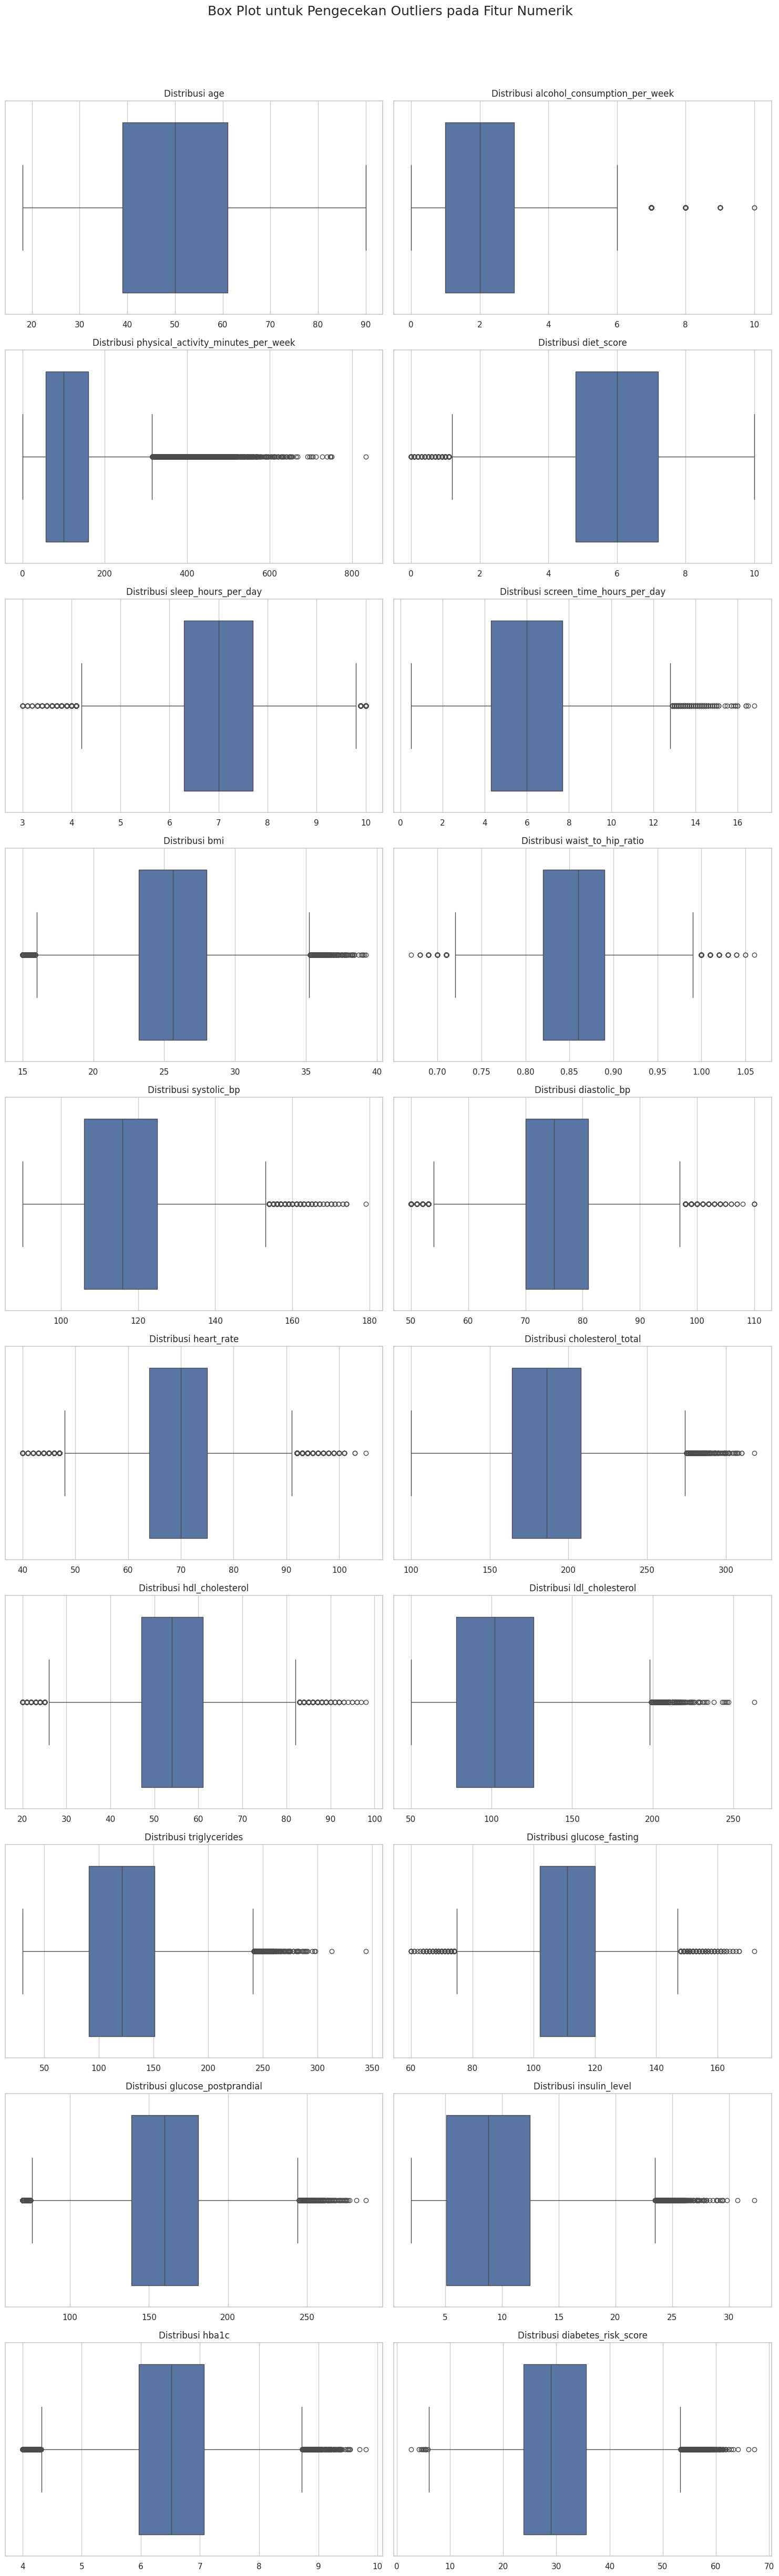

In [8]:
numerical_cols = [
  'age',
  'alcohol_consumption_per_week',
  'physical_activity_minutes_per_week',
  'diet_score',
  'sleep_hours_per_day',
  'screen_time_hours_per_day',
  'bmi',
  'waist_to_hip_ratio',
  'systolic_bp',
  'diastolic_bp',
  'heart_rate',
  'cholesterol_total',
  'hdl_cholesterol',
  'ldl_cholesterol',
  'triglycerides',
  'glucose_fasting',
  'glucose_postprandial',
  'insulin_level',
  'hba1c',
  'diabetes_risk_score'
]

num_of_cols = len(numerical_cols)
plot_cols = 2
plot_rows = math.ceil(num_of_cols / plot_cols)

sns.set(style="whitegrid")
plt.figure(figsize=(15, 5 * plot_rows))
plt.suptitle('Box Plot untuk Pengecekan Outliers pada Fitur Numerik', fontsize=18, y=0.98)

for i, col in enumerate(numerical_cols, 1):
  plt.subplot(plot_rows, plot_cols, i)
  sns.boxplot(x=df[col])
  plt.title(f'Distribusi {col}', fontsize=12)
  plt.xlabel('')

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

### Kuantifikasi Outliers dengan Metode IQR

Setelah melihat outliers secara visual, langkah selanjutnya adalah mengukurnya secara kuantitatif. Kode di bawah ini mengimplementasikan metode statistik IQR. Untuk setiap kolom numerik, kode menghitung Kuartil 1 (Q1), Kuartil 3 (Q3), dan Interquartile Range (IQR = Q3 - Q1). Batas bawah dan atas kemudian didefinisikan sebagai Q1−1.5×IQR dan Q3+1.5×IQR. Setiap titik data yang berada di luar rentang ini dihitung sebagai outlier. Hasilnya adalah sebuah laporan ringkas yang menampilkan jumlah dan persentase outliers untuk setiap fitur, mengkonfirmasi bahwa `physical_activity_minutes_per_week` memiliki persentase outliers tertinggi (3.20%).

In [9]:
print("Jumlah dan Persentase Outliers Menggunakan Metode IQR:")
for col in numerical_cols:
  Q1 = df[col].quantile(0.25)
  Q3 = df[col].quantile(0.75)
  IQR = Q3 - Q1
  lower_bound = Q1 - 1.5 * IQR
  upper_bound = Q3 + 1.5 * IQR

  outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
  num_outliers = len(outliers)

  total_data = len(df)
  percentage = (num_outliers / total_data) * 100

  if num_outliers > 0:
    print(f"- {col}: {num_outliers} data ({percentage:.2f}%)")

Jumlah dan Persentase Outliers Menggunakan Metode IQR:
- alcohol_consumption_per_week: 458 data (0.46%)
- physical_activity_minutes_per_week: 3199 data (3.20%)
- diet_score: 337 data (0.34%)
- sleep_hours_per_day: 900 data (0.90%)
- screen_time_hours_per_day: 305 data (0.30%)
- bmi: 744 data (0.74%)
- waist_to_hip_ratio: 273 data (0.27%)
- systolic_bp: 530 data (0.53%)
- diastolic_bp: 731 data (0.73%)
- heart_rate: 855 data (0.85%)
- cholesterol_total: 309 data (0.31%)
- hdl_cholesterol: 565 data (0.56%)
- ldl_cholesterol: 349 data (0.35%)
- triglycerides: 301 data (0.30%)
- glucose_fasting: 745 data (0.74%)
- glucose_postprandial: 634 data (0.63%)
- insulin_level: 326 data (0.33%)
- hba1c: 618 data (0.62%)
- diabetes_risk_score: 914 data (0.91%)


## Distribusi Data

Pada sub-bagian ini, akan dibuat dan menampilkan histogram untuk setiap fitur numerik dalam dataset. Histogram ini juga akan dilengkapi dengan kurva KDE (Kernel Density Estimate), yang memberikan visualisasi yang lebih halus mengenai bentuk distribusi data.

Memvisualisasikan distribusi data sangat penting untuk memahami bagaimana nilai-nilai dalam setiap fitur tersebar. Ini membantu untuk menjawab pertanyaan seperti: Apakah datanya terdistribusi normal (simetris)? Apakah datanya miring ke kanan (right-skewed) atau ke kiri (left-skewed)? Adanya kemiringan yang kuat pada beberapa fitur dapat memengaruhi performa model tertentu dan bisa menjadi pertimbangan untuk melakukan transformasi data (meskipun pada proyek ini mengandalkan model yang robust).

Dengan menjalankan kode di bawah, akan mendapatkan serangkaian plot histogram yang menunjukkan bentuk distribusi dari setiap variabel numerik. Dari plot-plot ini, dapat mengamati bahwa beberapa fitur seperti `age` memiliki distribusi yang relatif seragam, sementara banyak fitur klinis seperti `insulin_level`, `triglycerides`, dan `physical_activity_minutes_per_week` menunjukkan distribusi yang sangat miring ke kanan (right-skewed). Ini menandakan bahwa sebagian besar pasien memiliki nilai yang relatif rendah untuk fitur-fitur ini, namun ada sekelompok kecil pasien dengan nilai yang sangat tinggi, yang konsisten dengan temuan outliers sebelumnya.

### Visualisasi Distribusi dengan Histogram

Kode di bawah ini secara otomatis memilih semua kolom yang bertipe numerik dari DataFrame. Kemudian, ia melakukan loop untuk setiap kolom tersebut, membuat sebuah histogram (`sns.histplot`) untuk menampilkan frekuensi setiap rentang nilai. Penambahan parameter `kde=True` berguna untuk menggambar garis estimasi kepadatan probabilitas yang membantu memperjelas bentuk distribusi data. Hasilnya adalah serangkaian visualisasi yang informatif untuk setiap fitur numerik.

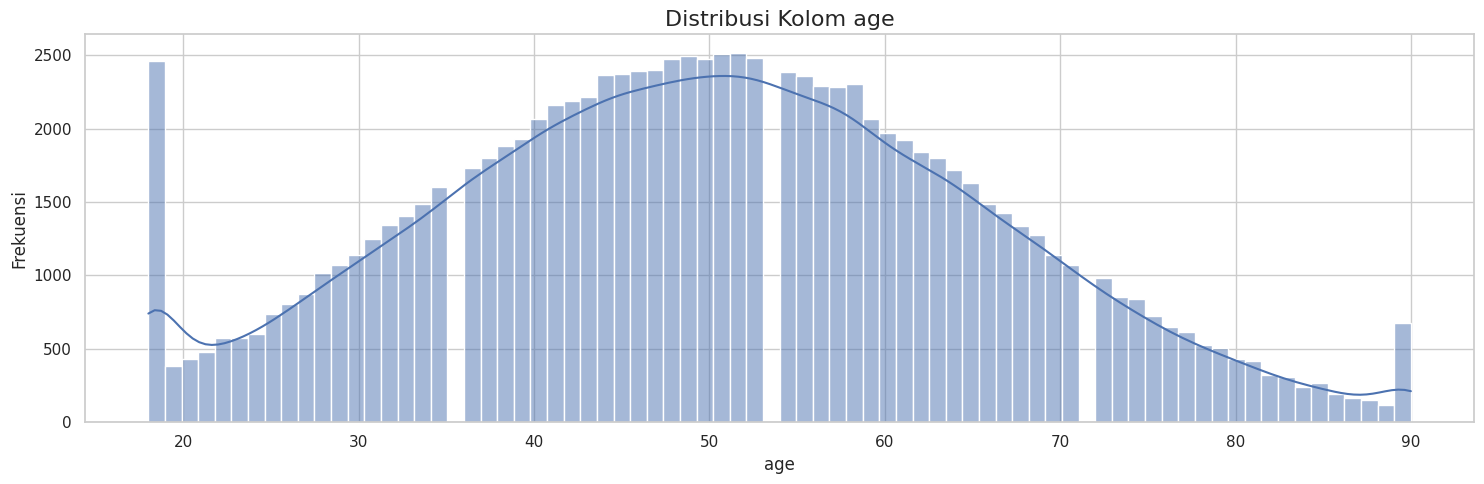

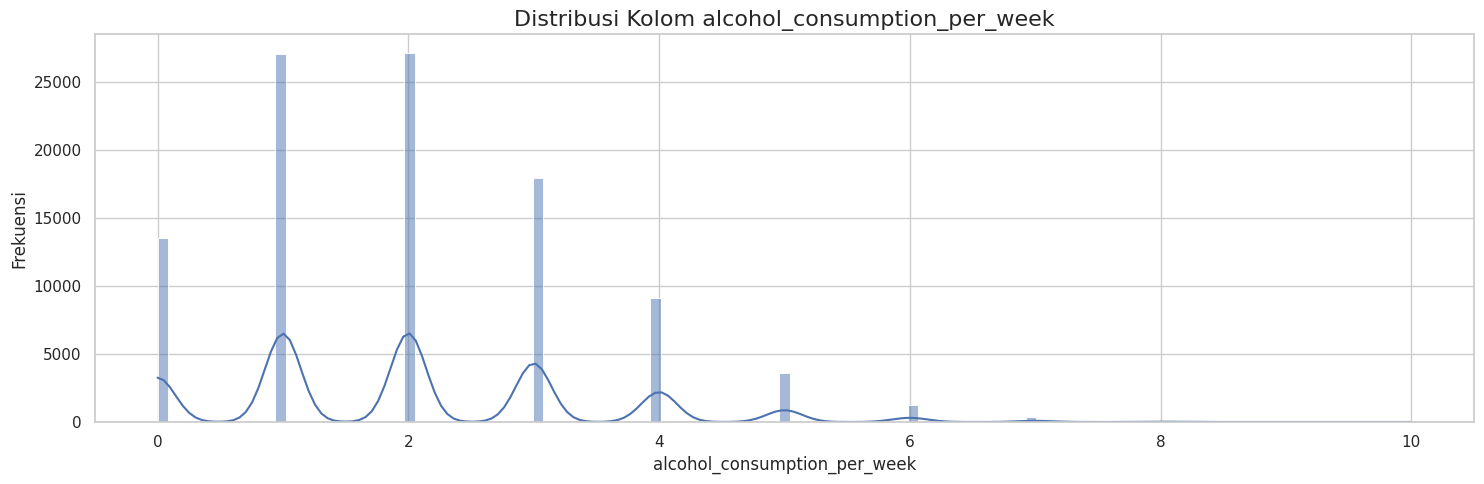

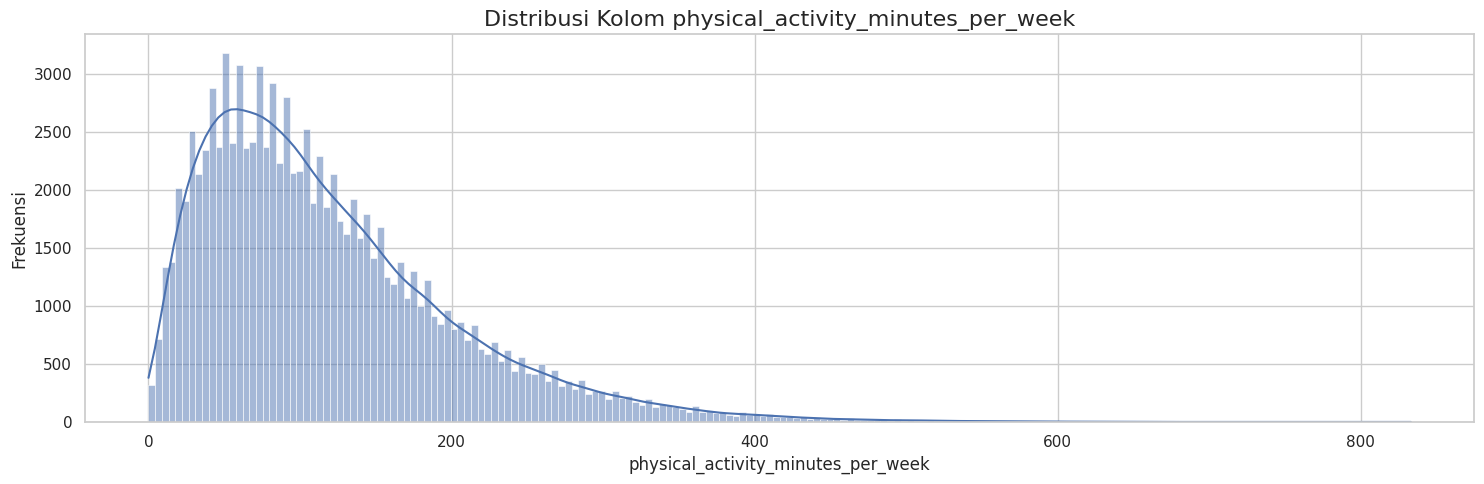

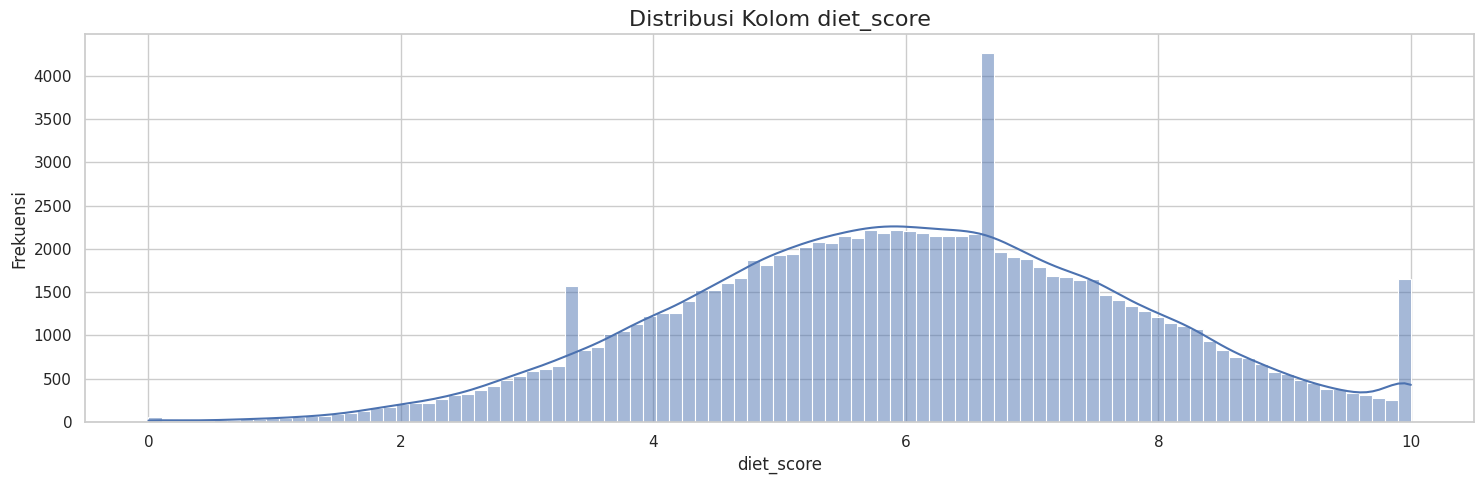

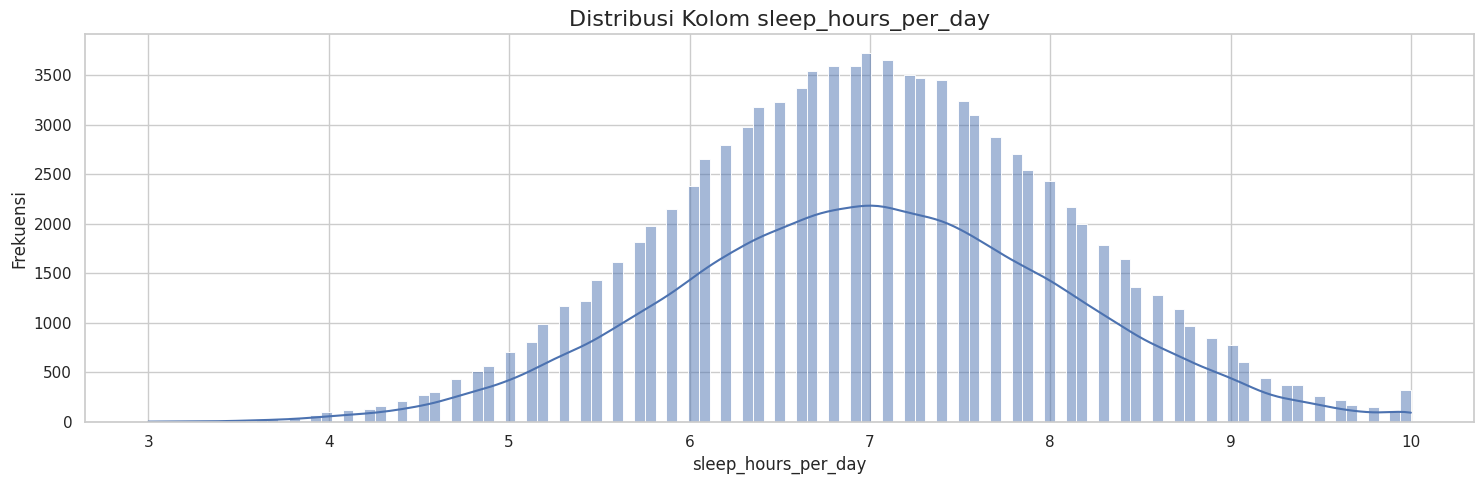

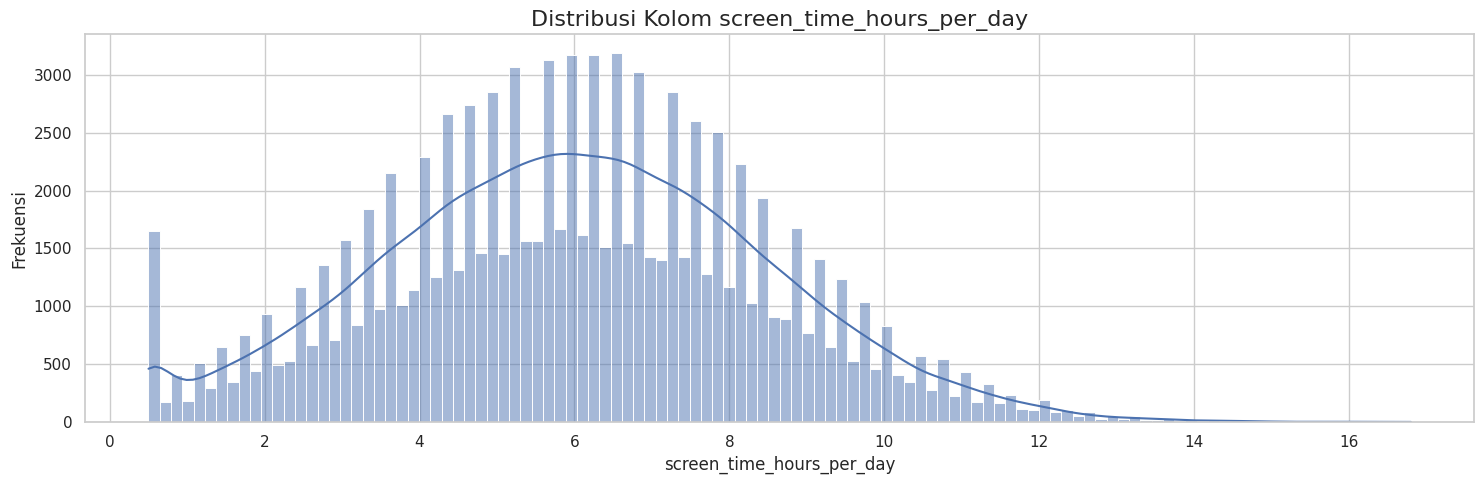

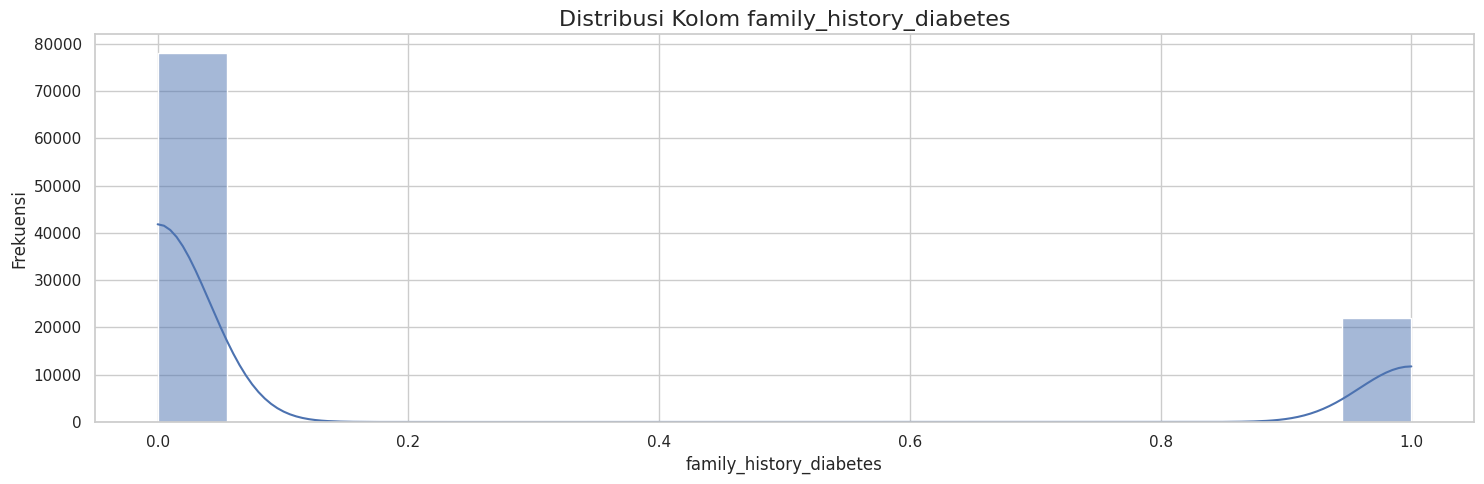

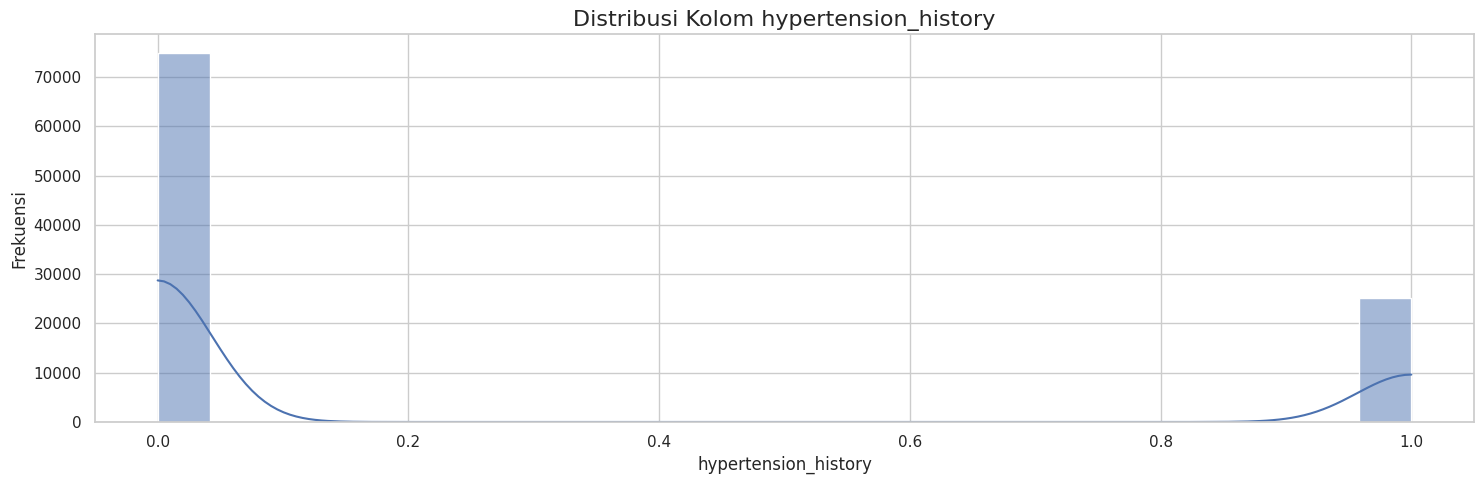

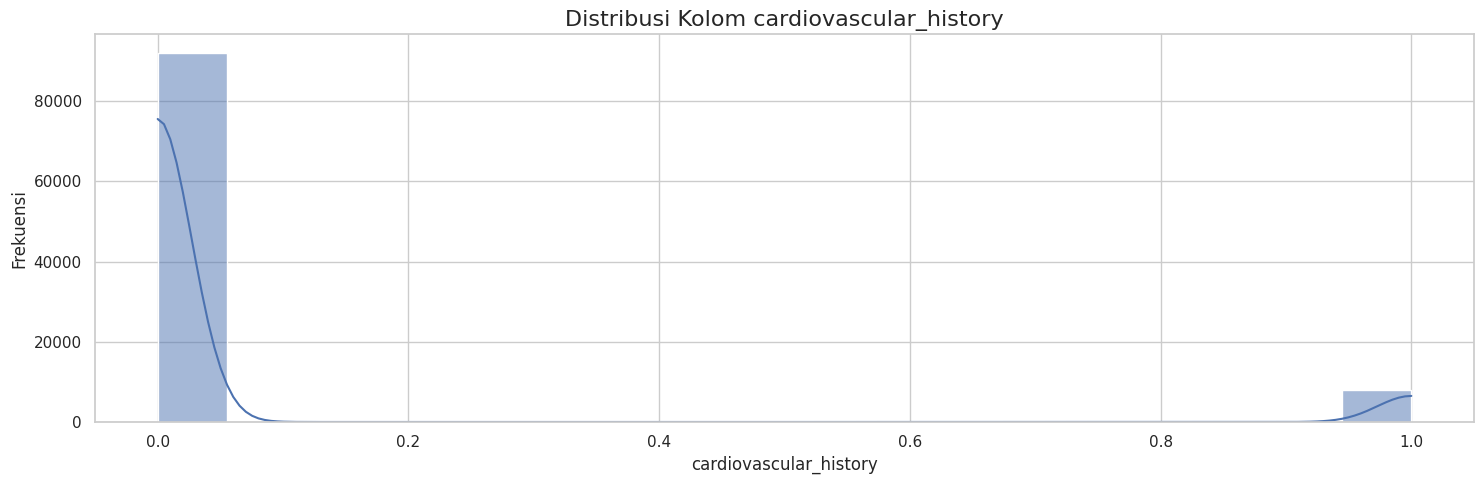

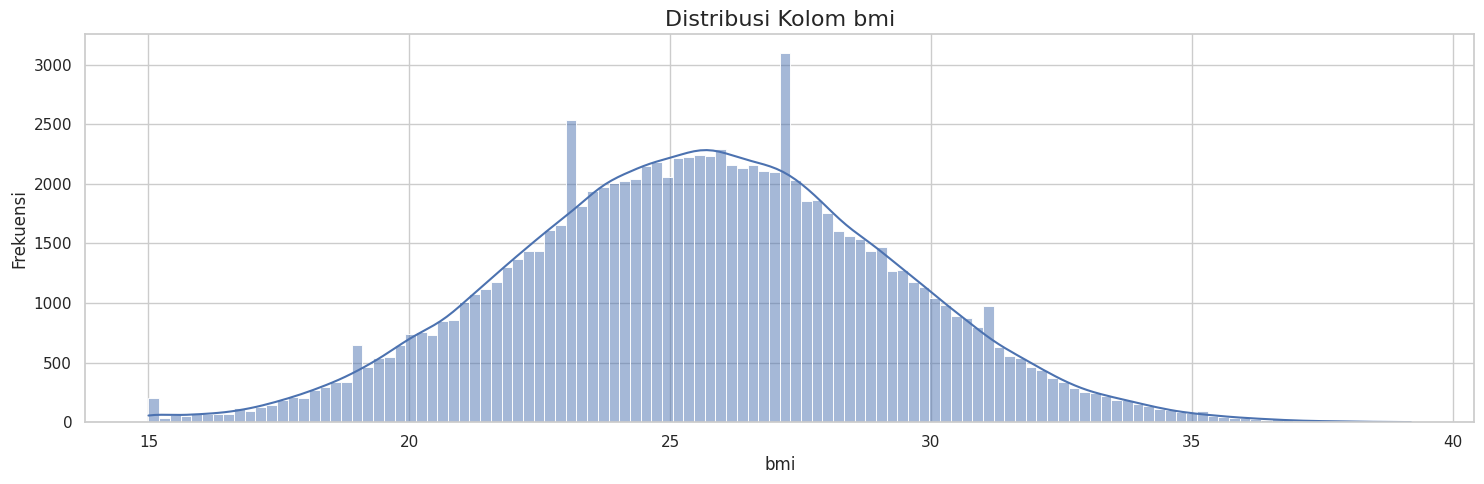

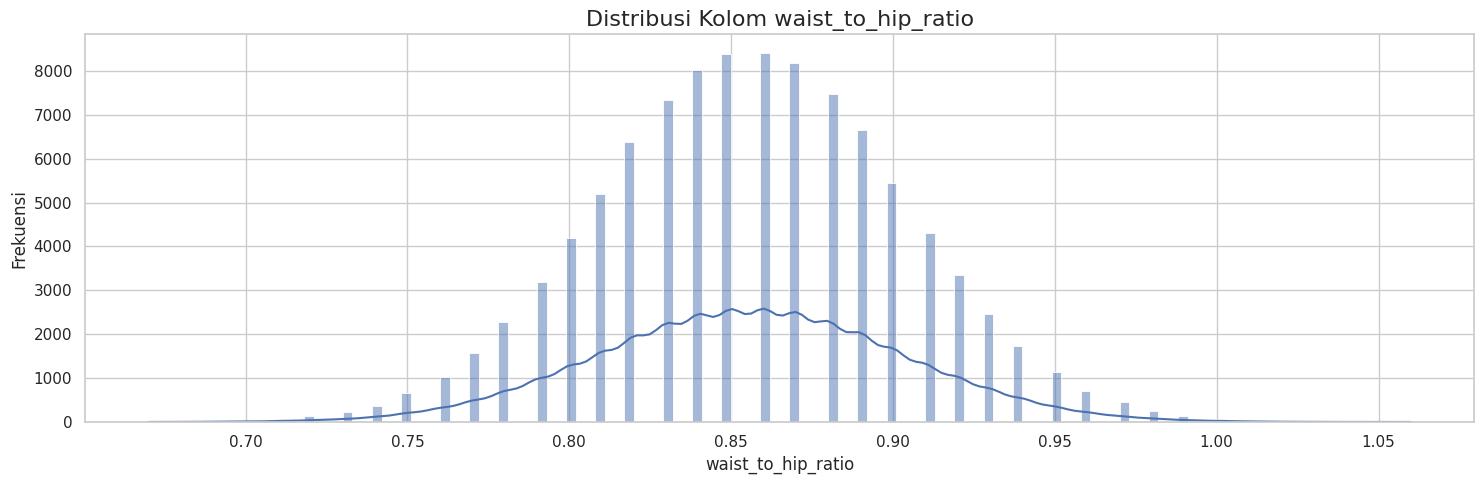

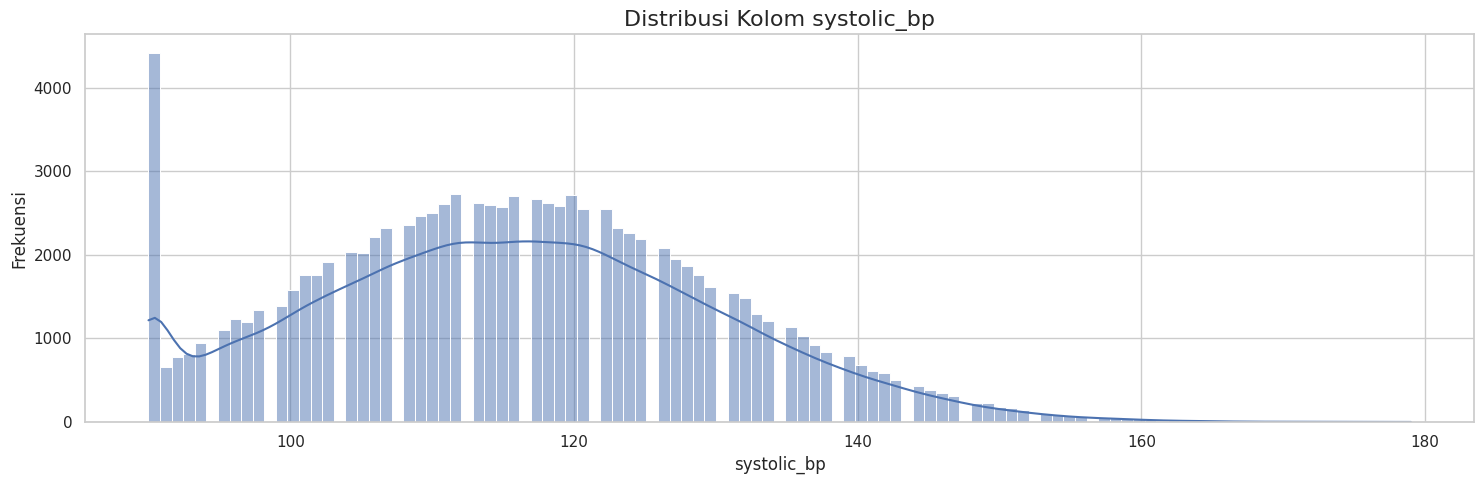

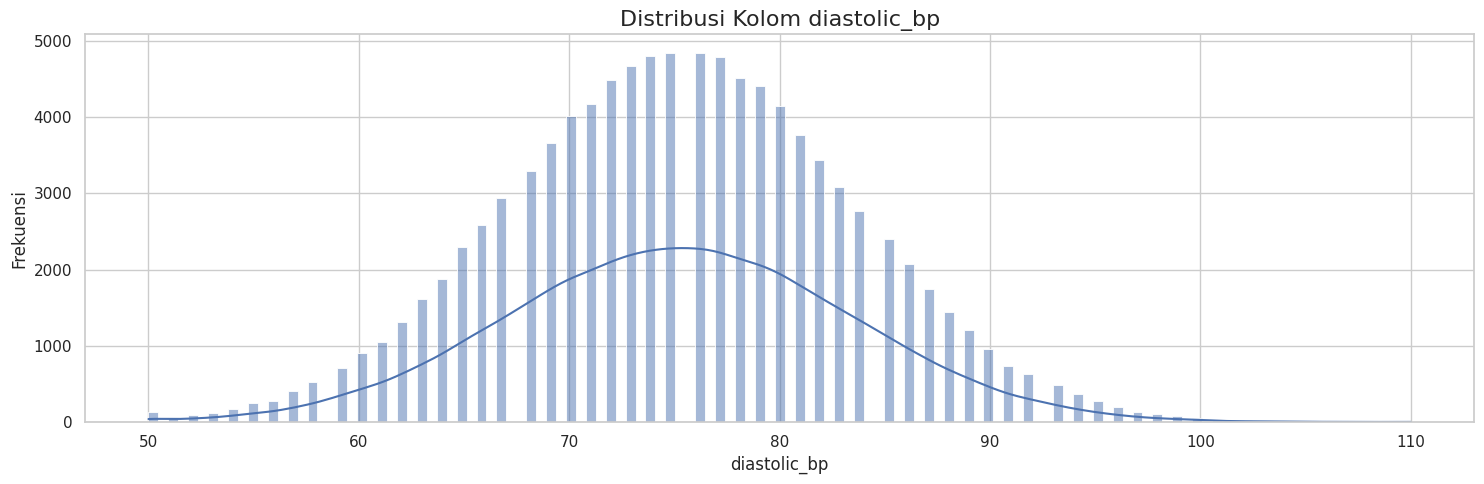

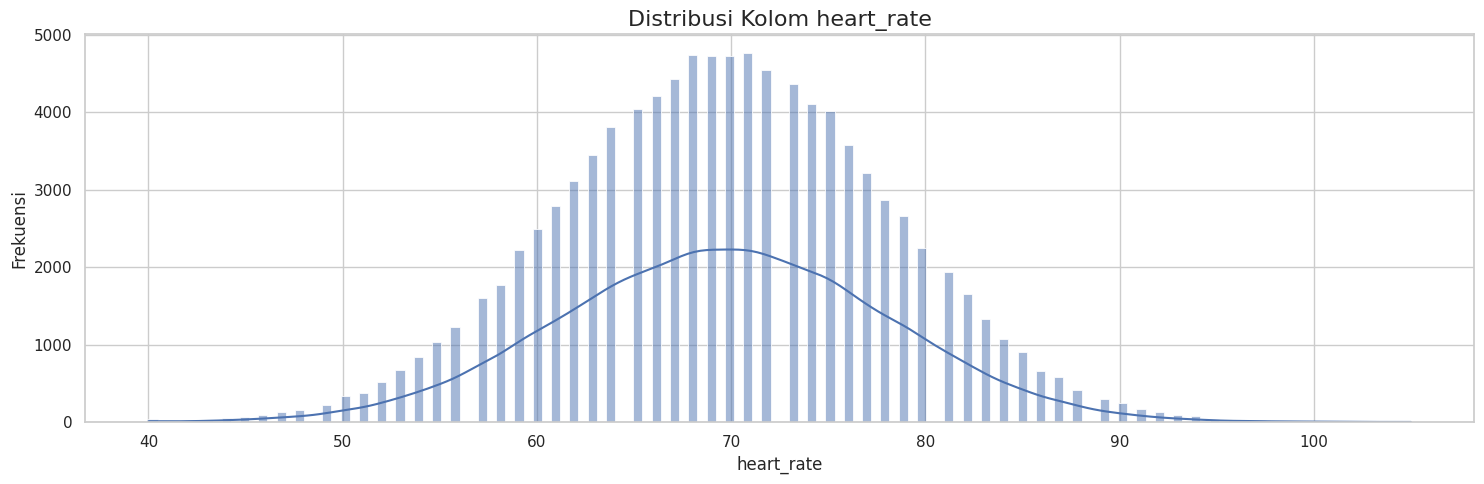

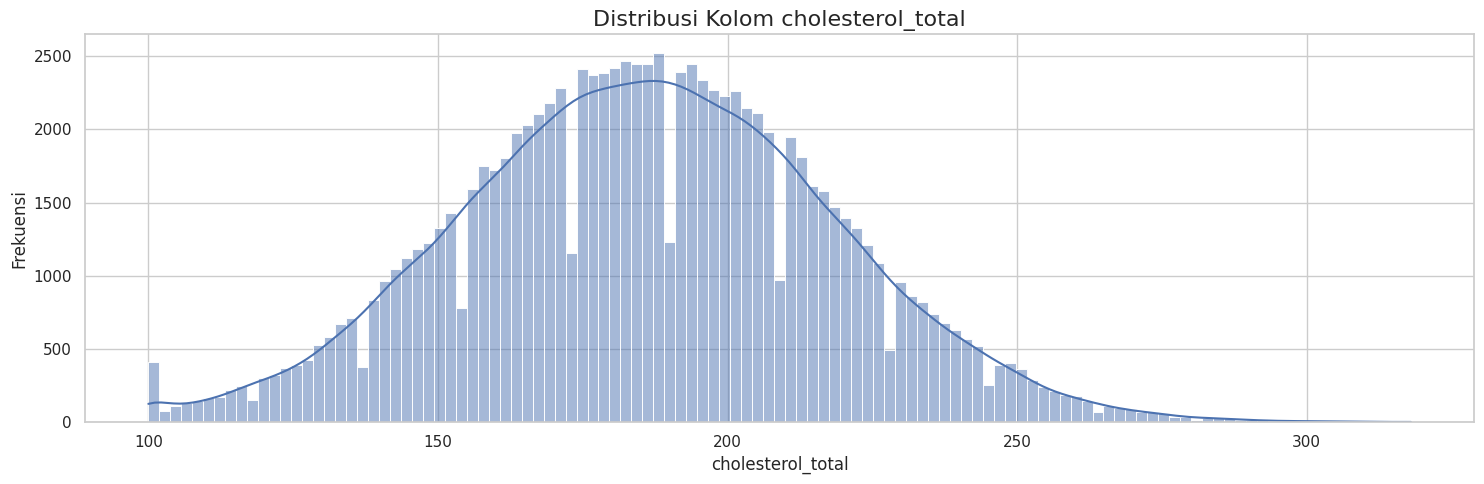

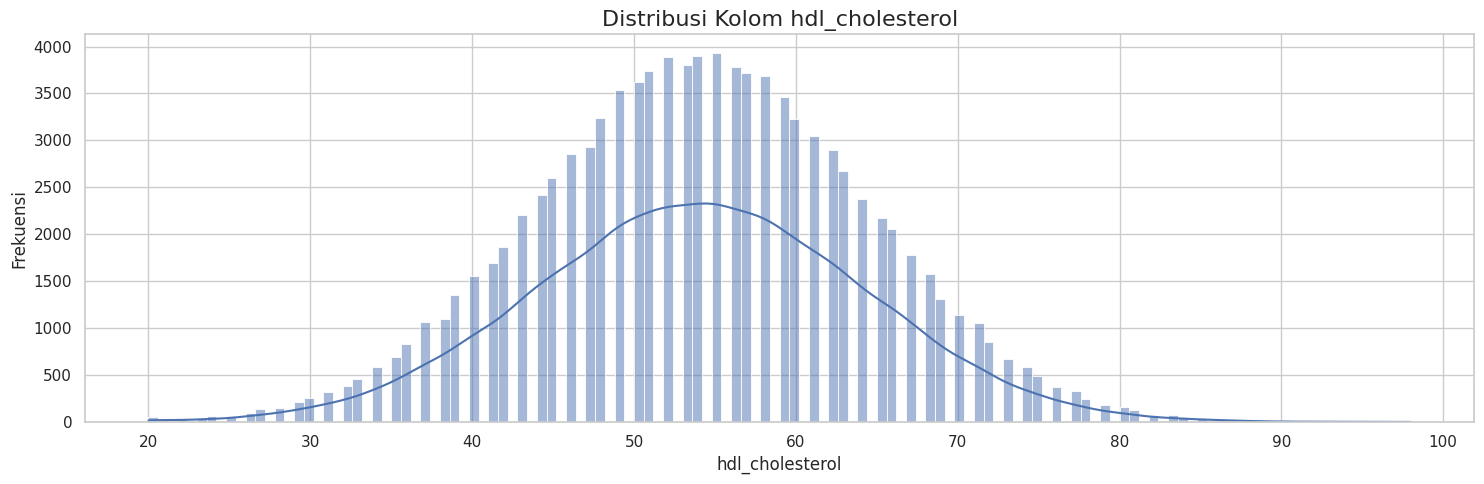

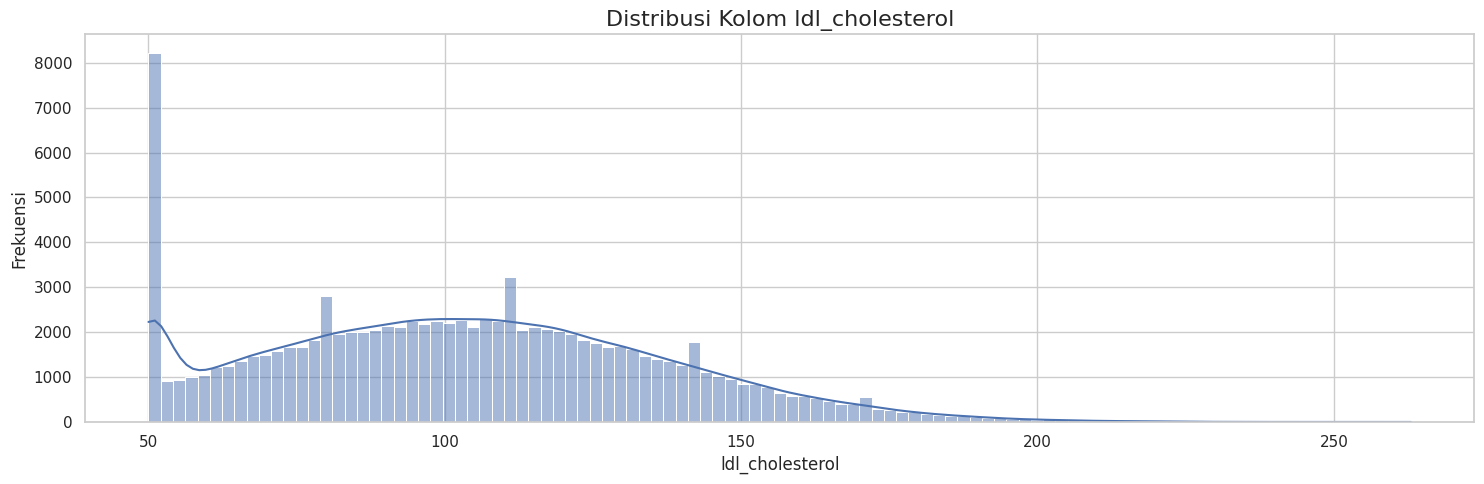

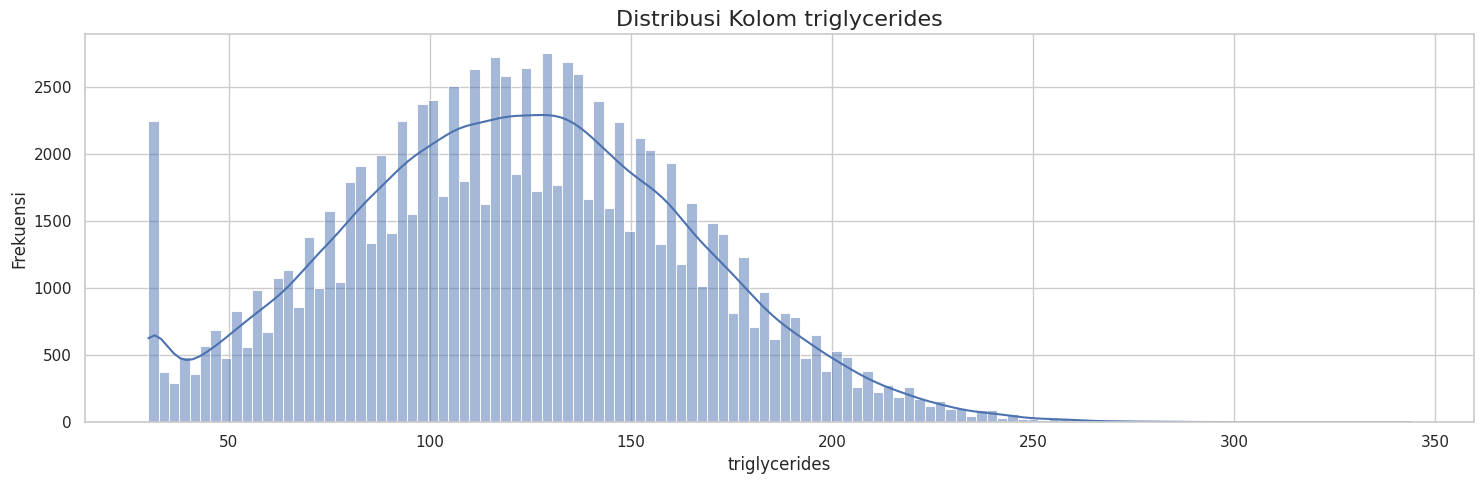

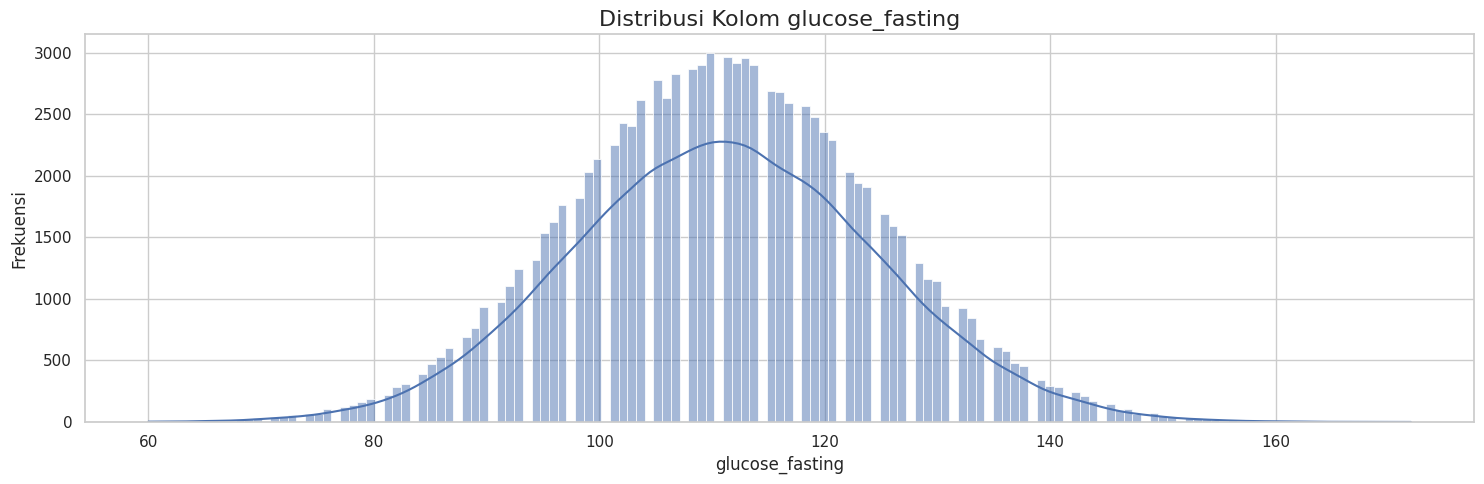

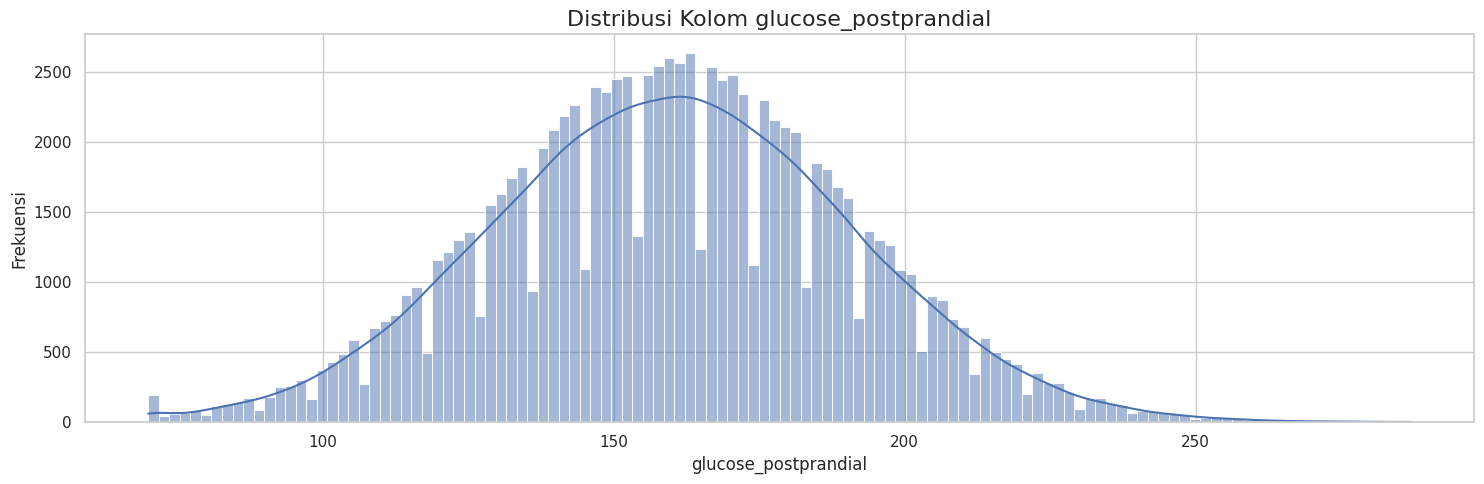

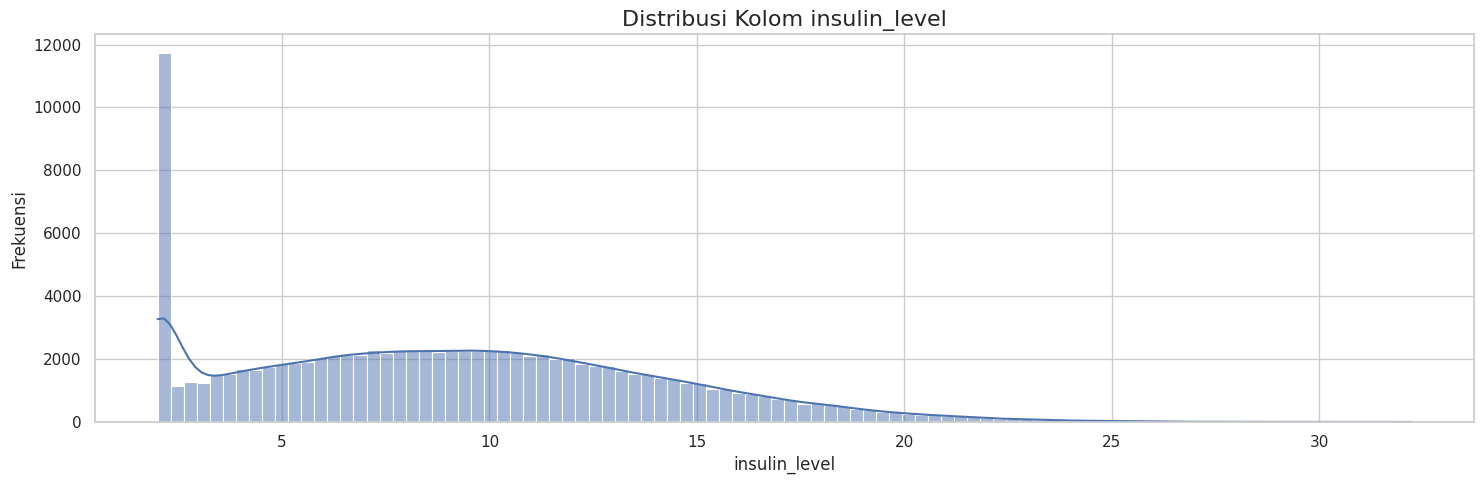

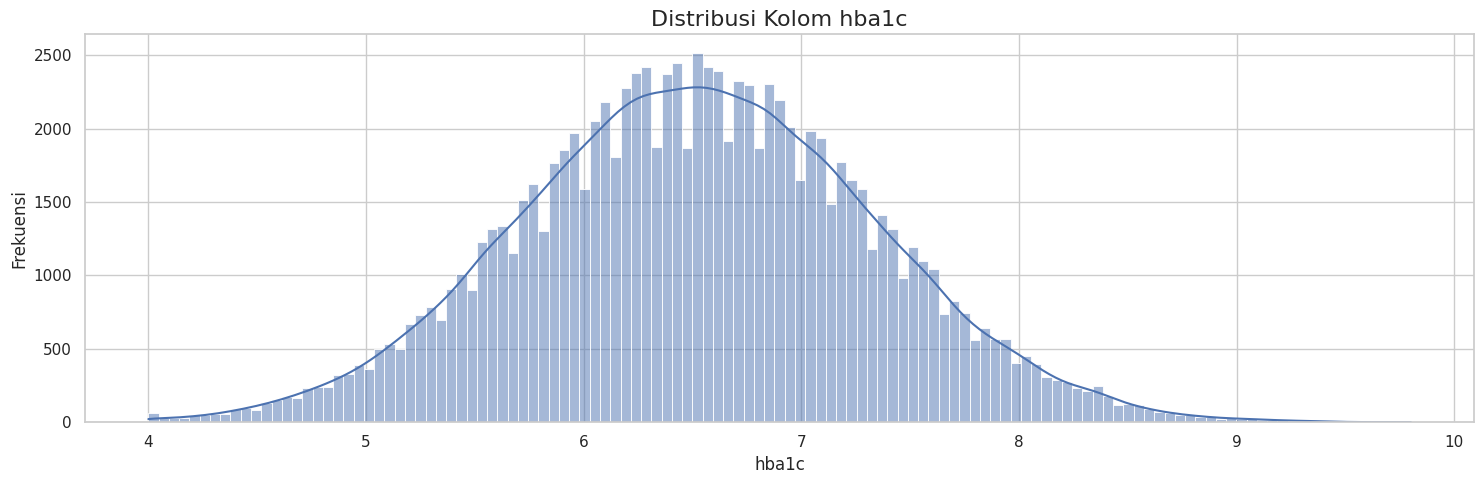

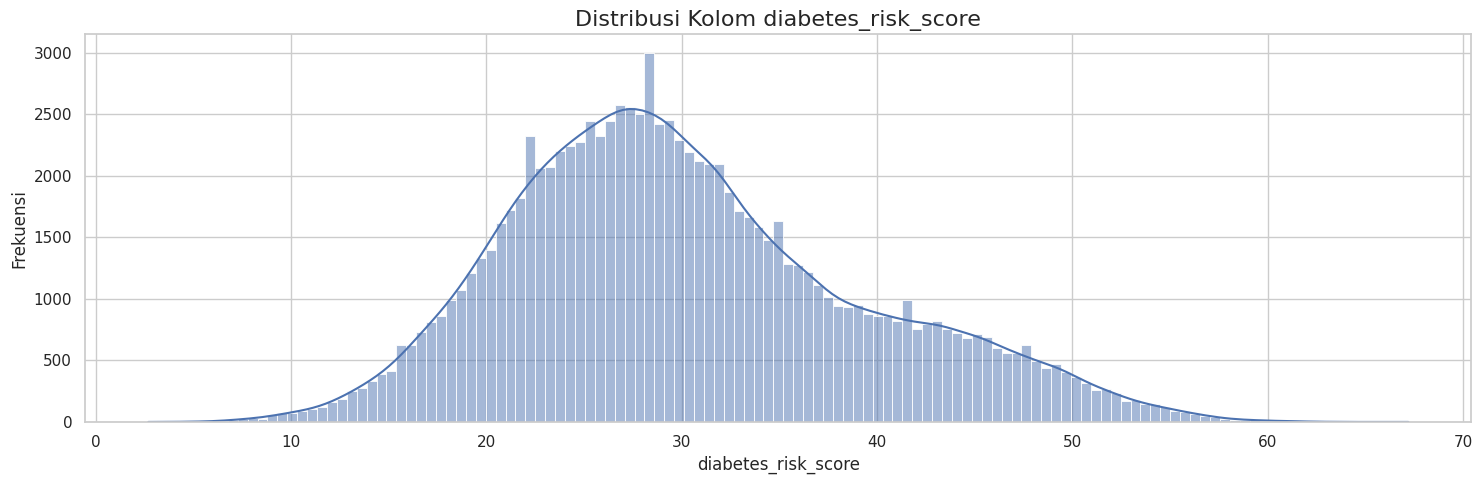

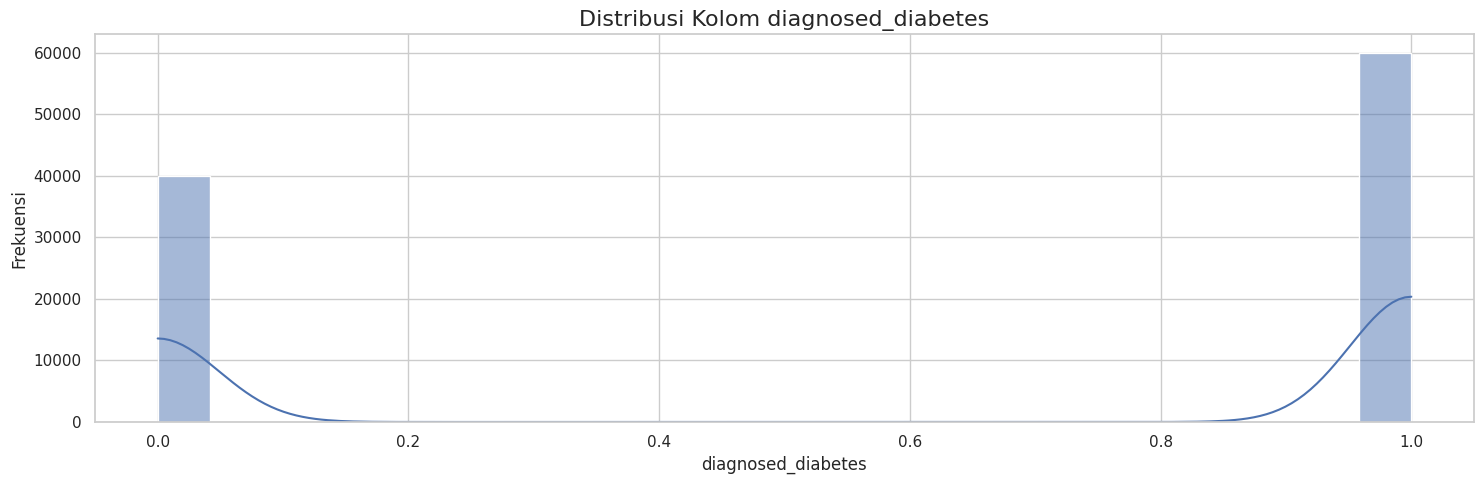

In [10]:
numerical_cols_all = df.select_dtypes(include='number')
sns.set(style="whitegrid")
for column in numerical_cols_all:
  plt.figure(figsize=(15, 5))

  sns.histplot(df[column], kde=True)
  plt.title(f'Distribusi Kolom {column}', fontsize=16)
  plt.xlabel(column)
  plt.ylabel('Frekuensi')

  plt.tight_layout()
  plt.show()

## Korelasi Antar Fitur

Pada tahap akhir dari EDA ini, menghitung matriks korelasi untuk semua fitur numerik. Matriks ini kemudian divisualisasikan dalam bentuk heatmap, yang menggunakan warna untuk merepresentasikan kekuatan dan arah hubungan linear antar variabel.

Tujuan utama dari analisis korelasi adalah untuk mengidentifikasi adanya multikolinearitas, yaitu suatu kondisi di mana dua atau lebih variabel independen memiliki hubungan yang sangat kuat satu sama lain. Memahami korelasi ini penting karena multikolinearitas yang tinggi dapat menyulitkan interpretasi pada beberapa model (seperti Regresi Logistik) dan terkadang bisa menjadi pertanda adanya fitur yang redundan.

Heatmap yang dihasilkan menunjukkan beberapa korelasi positif yang kuat, yang secara klinis sangat masuk akal. Sebagai contoh, korelasi yang sangat tinggi terlihat antara `hba1c` dengan `glucose_postprandial` (0.93) dan `glucose_fasting` (0.70), karena `HbA1c` adalah ukuran rata-rata glukosa darah. Demikian pula, `waist_to_hip_ratio` dan `bmi` (0.77) berkorelasi kuat karena keduanya adalah indikator obesitas. Meskipun ada korelasi yang kuat, tidak ada tindakan penghapusan fitur yang dilakukan, karena model utama yang digunakan (XGBoost dan LightGBM) secara inheren tahan terhadap efek multikolinearitas.

### Visualisasi Korelasi dengan Heatmap

Kode di bawah ini pertama-tama menghitung koefisien korelasi Pearson untuk setiap pasangan fitur numerik menggunakan fungsi `.corr()`. Hasilnya adalah sebuah DataFrame (matriks) yang kemudian di-plot menggunakan `sns.heatmap()`. Parameter `annot=True` digunakan untuk menampilkan nilai koefisien di setiap sel, `cmap='coolwarm'` mengatur skema warna (biru untuk korelasi negatif, merah untuk positif), dan `fmt='.2f'` memformat angka menjadi dua desimal. Hasilnya adalah visualisasi yang komprehensif dan mudah dibaca mengenai hubungan antar fitur.

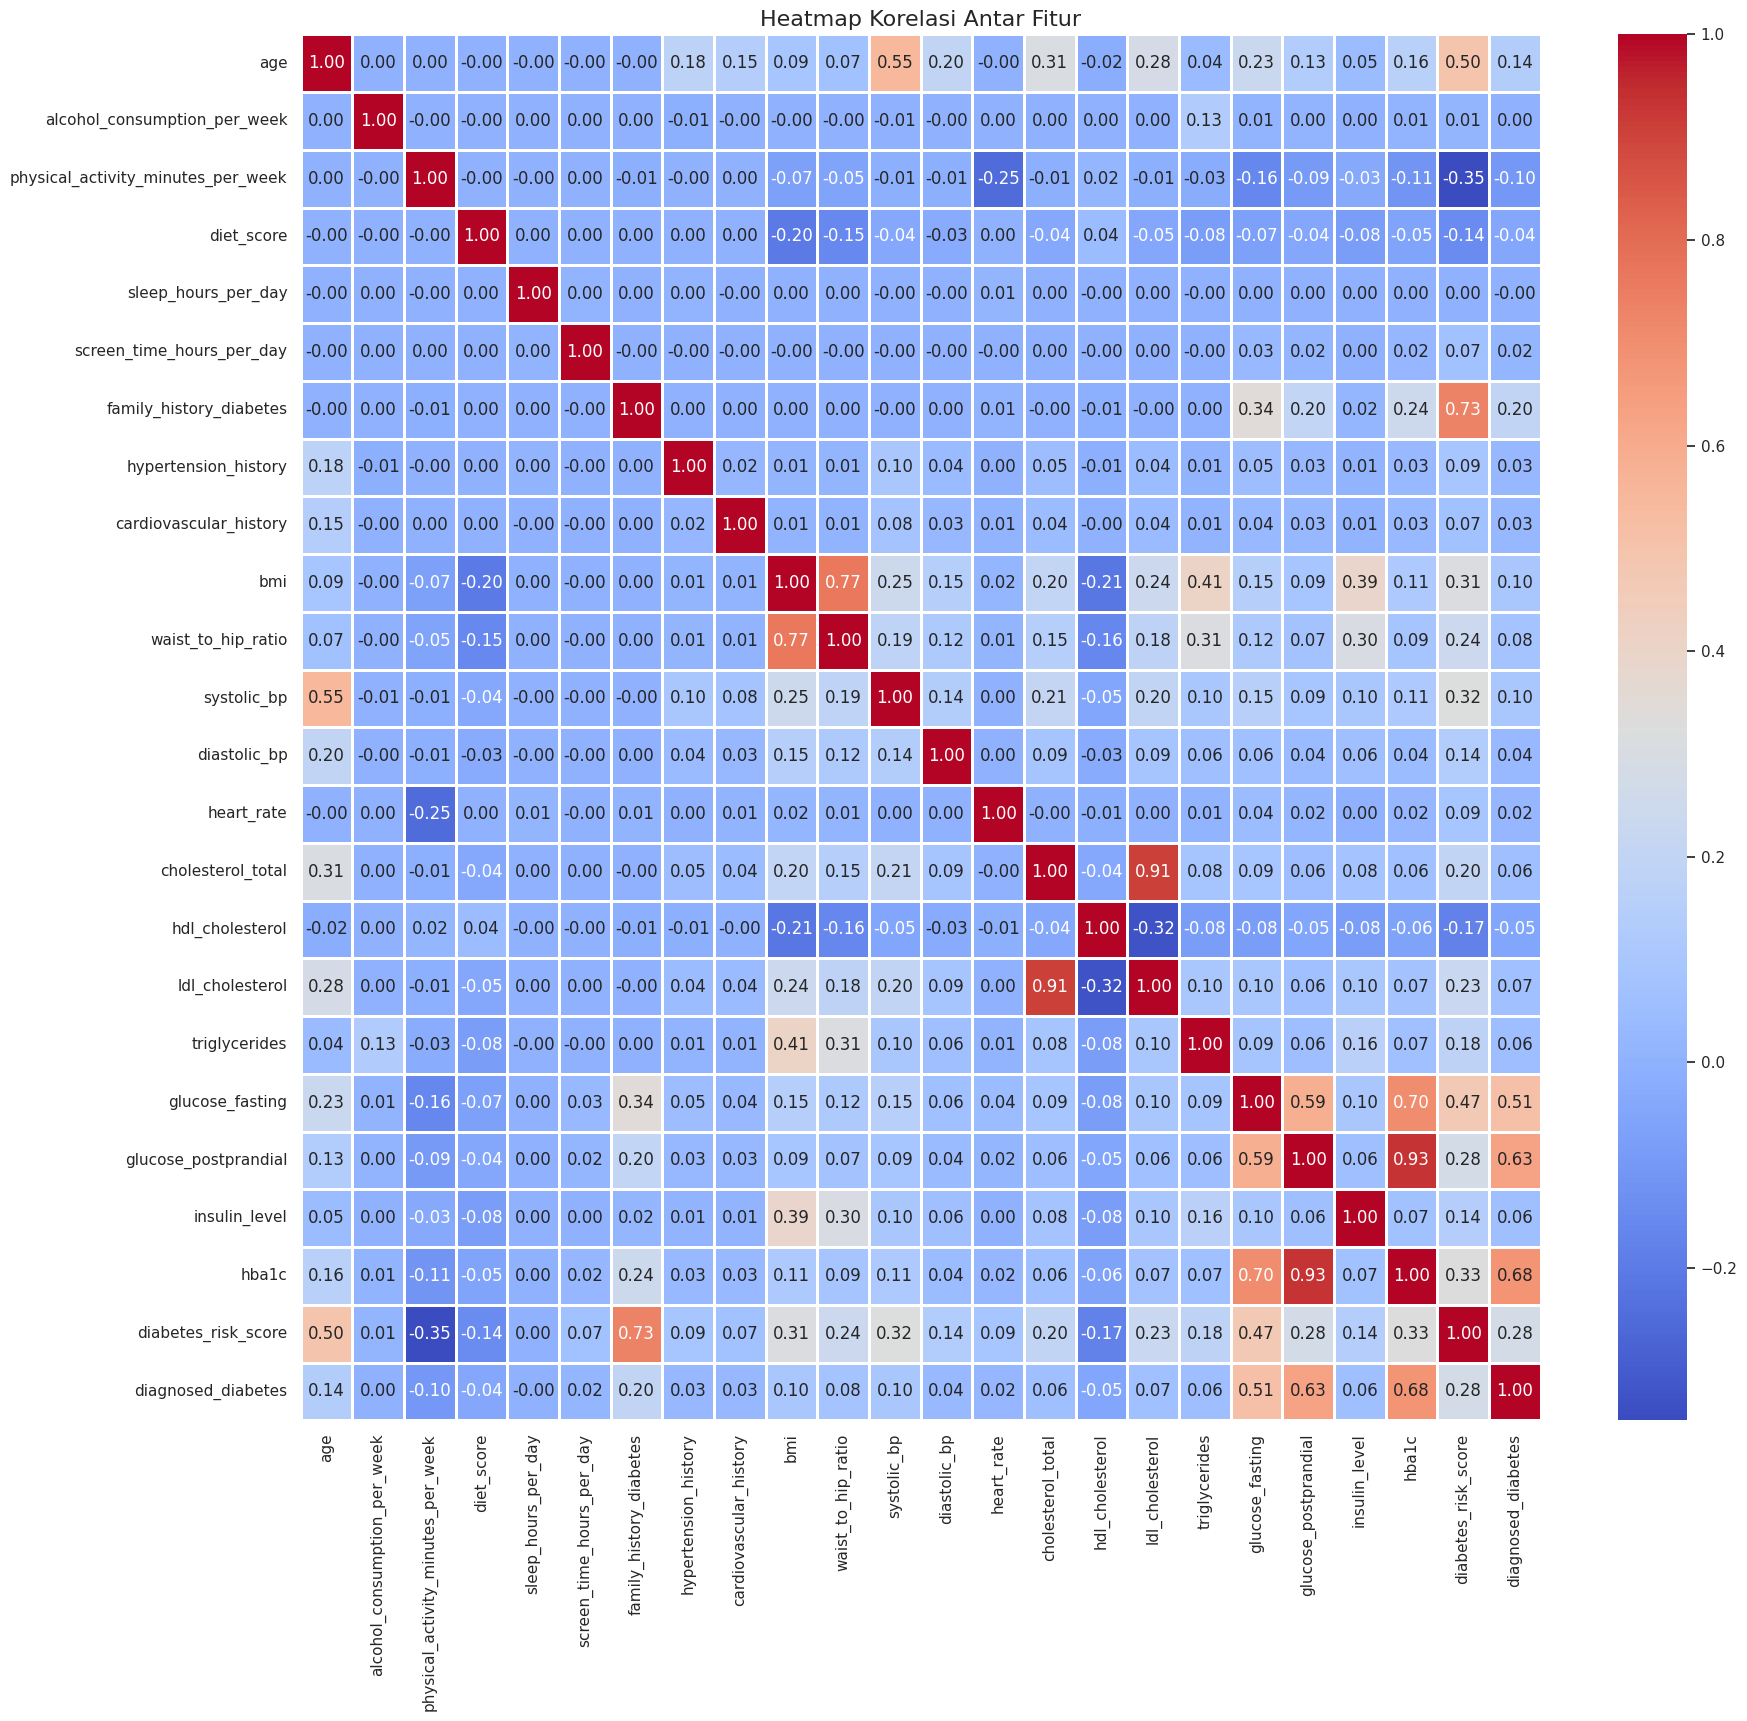

In [11]:
correlation_matrix = numerical_cols_all.corr()
plt.figure(figsize=(20, 18))
sns.heatmap(
  correlation_matrix,
  annot=True,
  cmap='coolwarm',
  fmt='.2f',
  linewidths=1
)
plt.title('Heatmap Korelasi Antar Fitur', fontsize=16)
plt.show()

# Data Preparation

Setelah memahami karakteristik data, tahap selanjutnya adalah Data Preparation. Ini adalah proses mengubah dan membersihkan data mentah menjadi format yang siap untuk dilatih oleh model machine learning.

Data mentah jarang sekali bisa langsung digunakan. Proses ini krusial untuk menangani masalah seperti data non-numerik, skala fitur yang berbeda, dan potensi kebocoran data. Persiapan data yang baik adalah fondasi untuk membangun model yang akurat dan andal.

Melalui serangkaian langkah yang terstruktur, akan menghasilkan dataset yang bersih, sepenuhnya numerik, dan terbagi dengan benar, siap untuk tahap pemodelan. Proses ini juga melibatkan keputusan penting seperti penanganan data leakage yang akan meningkatkan validitas hasil akhir model.

## Encoding Fitur Kategori

Langkah pertama dalam persiapan data adalah mengubah semua data non-numerik (kategorikal) menjadi format numerik. Proses ini mencakup reklasifikasi variabel target dan penerapan teknik encoding yang sesuai untuk setiap jenis fitur kategori.

Algoritma machine learning pada dasarnya bekerja dengan angka. Oleh karena itu, semua fitur yang berbentuk teks (seperti 'Female', 'High School', dll.) harus diubah menjadi representasi numerik agar dapat diproses oleh model.

Setelah proses ini, seluruh dataset (baik fitur maupun target) akan berada dalam format numerik, siap untuk tahap selanjutnya seperti penskalaan dan pemodelan.

### Reklasifikasi Variabel Target

Kode di bawah ini pertama-tama menyederhanakan lima kategori asli pada kolom `diabetes_stage` menjadi tiga kategori yang lebih bermakna ('No Diabetes', 'Pre-Diabetes', 'Diabetes'). Kemudian, `LabelEncoder` digunakan untuk mengubah tiga kategori teks ini menjadi format numerik berurutan (0, 1, 2), yang akan menjadi variabel target `y`.

In [24]:
df_encoded = df.copy()

diabetes_stage_map = {
  'No Diabetes': 'No Diabetes',
  'Pre-Diabetes': 'Pre-Diabetes',
  'Type 1': 'Pre-Diabetes',
  'Type 2': 'Diabetes',
  'Gestational': 'Diabetes'
}
df_encoded['diabetes_stage'] = df_encoded['diabetes_stage'].map(diabetes_stage_map)

le = LabelEncoder()
df_encoded['diabetes_stage'] = le.fit_transform(df_encoded['diabetes_stage'])

y = df_encoded['diabetes_stage']

### One-Hot Encoding untuk Fitur Nominal

Kode ini menerapkan One-Hot Encoding pada fitur-fitur yang tidak memiliki urutan (nominal) seperti `gender` dan `ethnicity`. Fungsi `pd.get_dummies()` secara otomatis membuat kolom biner baru untuk setiap kategori, dan `drop_first=True` digunakan untuk menghindari multikolinearitas. Hasilnya, fitur-fitur ini direpresentasikan secara numerik tanpa model membuat asumsi urutan yang salah.

In [25]:
cols_onehot = ['gender', 'ethnicity', 'employment_status', 'smoking_status']
df_encoded = pd.get_dummies(df_encoded, columns=cols_onehot, drop_first=True)

### Label Encoding untuk Fitur Ordinal

Untuk fitur yang memiliki tingkatan atau urutan (ordinal) seperti `education_level` dan `income_level`, akan menggunakan Label Encoding secara manual dengan `.map()`. Dengan mendefinisikan urutannya secara eksplisit (misal: 'Low' = 0, 'Lower-Middle' = 1), memastikan bahwa informasi tingkatan ini tetap terjaga dalam representasi numeriknya.

In [26]:
education_map = {
  'No formal': 0,
  'Highschool': 1,
  'Postgraduate': 2,
  'Graduate': 3
}
income_map = {
  'Low': 0,
  'Lower-Middle': 1,
  'Middle': 2,
  'Upper-Middle': 3,
  'High': 4
}

df_encoded['education_level'] = df_encoded['education_level'].map(education_map)
df_encoded['income_level'] = df_encoded['income_level'].map(income_map)

## Penanganan Data Leakage

Pada sub-bagian ini, mengidentifikasi dan menghapus kolom-kolom yang dapat menyebabkan kebocoran data (data leakage). Berdasarkan analisis awal, kolom `diabetes_risk_score` dan `diagnosed_diabetes` dihapus dari set fitur `X`.

Kolom-kolom ini mengandung informasi yang secara langsung atau tidak langsung berasal dari variabel target (`diabetes_stage`). Jika kolom ini disertakan, model akan "menyontek" jawabannya, menghasilkan akurasi yang sangat tinggi secara artifisial namun tidak realistis pada data baru. Menghapusnya memastikan model belajar dari prediktor yang valid.

Dengan menghapus kolom-kolom ini, akan menciptakan dataset fitur (`X`) yang lebih valid dan memastikan bahwa evaluasi performa model nantinya akan mencerminkan kemampuan prediksi yang sebenarnya.

In [27]:
X = df_encoded.drop(['diabetes_risk_score', 'diabetes_stage', 'diagnosed_diabetes'], axis=1)

## Pembagian Dataset

Dataset yang sudah bersih dan sepenuhnya numerik kini dibagi menjadi dua set terpisah: data pelatihan (80%) dan data pengujian (20%).

Pembagian ini sangat krusial untuk evaluasi model yang objektif. Model akan "belajar" pola dari data pelatihan, dan kemudian performanya akan diuji pada data pengujian yang "belum pernah dilihatnya". Ini mensimulasikan bagaimana model akan bekerja pada data baru di dunia nyata.

Ini menghasilkan empat set data: X_train, X_test, y_train, dan y_test, yang siap untuk digunakan dalam tahap pemodelan dan evaluasi.

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Standarisasi

Pada tahap akhir persiapan ini, menerapkan standarisasi pada fitur-fitur numerik menggunakan `StandardScaler`.

Beberapa model, seperti KNN dan Regresi Logistik, sensitif terhadap skala fitur. Standarisasi mengubah data sehingga memiliki rata-rata 0 dan standar deviasi 1, memastikan tidak ada fitur yang mendominasi proses pembelajaran hanya karena rentang nilainya yang lebih besar. Penting untuk dicatat bahwa scaler ini "dipelajari" (`.fit()`) hanya pada `X_train` untuk mencegah kebocoran informasi dari data uji.

Dihasilkan `X_train_scaled` dan `X_test_scaled`, yaitu versi data latih dan uji yang fiturnya sudah memiliki skala yang seragam, siap untuk dilatih oleh semua jenis model.

In [29]:
scaler = StandardScaler()
scaler.fit(X_train)

X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Model Development

Pada tahap ini, akan melatih empat model machine learning yang berbeda menggunakan data pelatihan (`X_train_scaled` dan `y_train`) yang telah disiapkan. Keempat model ini—K-Nearest Neighbors, Regresi Logistik, XGBoost, dan LightGBM—akan dilatih secara terpisah.

Tujuan utama dari tahap ini adalah untuk mengimplementasikan pendekatan solusi yang telah dirumuskan, yaitu melakukan analisis komparatif. Dengan melatih beberapa model, dapat secara objektif membandingkan performa mereka pada dataset yang sama dan mengidentifikasi algoritma mana yang paling efektif untuk menyelesaikan masalah prediksi tahapan diabetes ini.

Setiap model akan menghasilkan serangkaian prediksi pada data uji (`y_pred`). Hasil prediksi inilah yang akan menjadi dasar untuk tahap evaluasi, di mana akan mengukur dan membandingkan akurasi, presisi, dan recall dari setiap model untuk menentukan pemenangnya.

## K-Nearest Neighbors

KNN adalah model instance-based learning yang mengklasifikasikan titik data baru berdasarkan mayoritas kelas dari 'k' tetangga terdekatnya.

KNN diimplementasikan sebagai salah satu model dasar (baseline) dalam proyek ini. Karena kesederhanaannya, KNN memberikan titik referensi yang baik untuk mengukur apakah model yang lebih kompleks (seperti XGBoost) benar-benar memberikan peningkatan performa yang signifikan.

Model KNN berhasil dilatih dan menghasilkan prediksi pada data uji, yang disimpan dalam variabel `y_pred_knn`. Hasil ini akan dievaluasi lebih lanjut untuk melihat kemampuannya, terutama dalam mengidentifikasi kelas minoritas seperti 'Pre-Diabetes'.

In [ ]:
model_knn = KNeighborsClassifier()
model_knn.fit(X_train_scaled, y_train)
y_pred_knn = model_knn.predict(X_test_scaled)

## Logistic Regression

Model ini adalah algoritma linear yang menghitung probabilitas suatu data masuk ke dalam kelas tertentu. Parameter `multi_class='multinomial'` digunakan karena memiliki tiga kelas target, dan `max_iter=1000` untuk memastikan konvergensi.

Sama seperti KNN, Regresi Logistik diimplementasikan sebagai model baseline kedua. Model ini dipilih karena efisiensinya, interpretabilitasnya yang tinggi, dan seringkali menjadi standar perbandingan yang kuat dalam masalah klasifikasi medis.

Model Regresi Logistik berhasil dilatih dan prediksinya disimpan dalam variabel `y_pred_lr`. Performa model ini akan dibandingkan secara langsung dengan model lain untuk mengevaluasi efektivitas pendekatan linear pada dataset ini.

In [ ]:
model_lr = LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=1000)
model_lr.fit(X_train_scaled, y_train)
y_pred_lr = model_lr.predict(X_test_scaled)

/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


## XGBoost Classifier

Model ini bekerja dengan membangun pohon keputusan secara berurutan, di mana setiap pohon baru fokus untuk memperbaiki kesalahan dari pohon sebelumnya.

XGBoost diimplementasikan sebagai model canggih pertama. Berdasarkan banyak penelitian, XGBoost dikenal memiliki performa prediktif yang sangat tinggi pada dataset tabular seperti data medis. Tujuannya adalah untuk melihat seberapa besar peningkatan performa yang bisa dicapai dibandingkan dengan model baseline.

Model XGBoost berhasil dilatih dan prediksinya disimpan dalam `y_pred_xgb`. Diharapkan model ini menunjukkan peningkatan signifikan dalam metrik evaluasi, terutama pada recall untuk kelas-kelas yang sulit diprediksi.

In [ ]:
model_xgb = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')
model_xgb.fit(X_train_scaled, y_train)
y_pred_xgb = model_xgb.predict(X_test_scaled)

/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [12:14:47] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


## LightGBM Classifier

Model LightGBM (Light Gradient Boosting Machine), yang merupakan implementasi lain dari gradient boosting. LightGBM dikenal karena kecepatan dan efisiensinya tanpa mengorbankan akurasi.

LightGBM diimplementasikan sebagai model canggih kedua untuk dibandingkan dengan XGBoost. Keunggulannya dalam kecepatan pelatihan membuatnya menjadi pilihan yang menarik. Tujuannya adalah untuk menentukan apakah LightGBM dapat memberikan performa yang setara atau bahkan lebih baik dari XGBoost pada dataset ini.

Model LightGBM berhasil dilatih, dan hasil prediksinya disimpan dalam `y_pred_lgb`. Model ini menjadi kandidat kuat untuk menjadi model final dalam proyek ini, dan performanya akan dievaluasi secara mendalam di tahap selanjutnya.

In [ ]:
model_lgb = LGBMClassifier()
model_lgb.fit(X_train_scaled, y_train)
y_pred_lgb = model_lgb.predict(X_test_scaled)

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.016739 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2730
[LightGBM] [Info] Number of data points in the train set: 80000, number of used features: 35
[LightGBM] [Info] Start training from score -0.508412
[LightGBM] [Info] Start training from score -2.522609
[LightGBM] [Info] Start training from score -1.144761


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


# Evaluasi

Pada tahap ini, dilakukan evaluasi kuantitatif terhadap semua model yang telah dilatih. Proses ini dimulai dengan evaluasi performa awal dari keempat model untuk memilih yang terbaik, dilanjutkan dengan optimasi model terpilih, dan diakhiri dengan evaluasi final pada data uji.

Evaluasi adalah tahap krusial untuk mengukur seberapa baik sebuah model dapat menyelesaikan masalah yang ada. Tanpa evaluasi yang objektif menggunakan metrik yang tepat, tidak dapat memvalidasi solusi yang telah dibangun. Tujuan utamanya adalah untuk mendapatkan bukti kuantitatif mengenai performa model sebelum menarik kesimpulan.

Tahap ini akan menghasilkan perbandingan performa yang jelas antar model, sebuah model akhir yang telah dioptimalkan, dan laporan kinerja final yang menjadi tolok ukur keberhasilan proyek ini.

## Evaluasi Performa Awal Model

Mengambil hasil prediksi dari keempat model (`y_pred_knn`, `y_pred_lr`, `y_pred_xgb`, `y_pred_lgb`) dan mengevaluasinya menggunakan Classification Report dan Confusion Matrix.

Langkah ini merupakan inti dari analisis komparatif. Dengan menampilkan metrik performa (Precision, Recall, F1-Score) dan visualisasi kesalahan (Confusion Matrix) secara berdampingan, dapat secara langsung membandingkan kekuatan dan kelemahan setiap model. Ini memungkinkan untuk membuat keputusan berbasis data dalam memilih model mana yang paling unggul, terutama dalam mendeteksi kelas kritis seperti 'Pre-Diabetes' dan 'Diabetes'.

Hasil evaluasi awal menunjukkan bahwa model ensemble (XGBoost dan LightGBM) jauh mengungguli model dasar. LightGBM secara khusus menonjol karena berhasil mencapai recall sempurna (1.00) untuk kelas 'Pre-Diabetes' dan 'Diabetes', menjadikannya kandidat terkuat untuk dioptimalkan lebih lanjut.

In [ ]:
all_predictions = {
  "K-Nearest Neighbors": y_pred_knn,
  "Logistic Regression": y_pred_lr,
  "XGBoost Classifier": y_pred_xgb,
  "LightGBM Classifier": y_pred_lgb
}

class_names = ['No Diabetes', 'Pre-Diabetes', 'Diabetes']
class_indices = [str(i) for i in range(len(class_names))]

for model_name, y_pred in all_predictions.items():
  print(f"===================== {model_name} =====================")

  print("\nClassification Report:")
  print(classification_report(y_test, y_pred, target_names=class_names))

  print("\n")

===================== K-Nearest Neighbors =====================

Classification Report:
              precision    recall  f1-score   support

 No Diabetes       0.79      0.84      0.81     11936
Pre-Diabetes       0.61      0.42      0.50      1561
    Diabetes       0.60      0.57      0.59      6503

    accuracy                           0.72     20000
   macro avg       0.67      0.61      0.63     20000
weighted avg       0.71      0.72      0.71     20000



===================== Logistic Regression =====================

Classification Report:
              precision    recall  f1-score   support

 No Diabetes       0.86      0.89      0.88     11936
Pre-Diabetes       0.80      0.68      0.73      1561
    Diabetes       0.75      0.73      0.74      6503

    accuracy                           0.82     20000
   macro avg       0.80      0.77      0.78     20000
weighted avg       0.82      0.82      0.82     20000



===================== XGBoost Classifier =================

In [ ]:
accuracy_scores = []
for model_name, y_pred in all_predictions.items():
  accuracy = accuracy_score(y_test, y_pred)
  accuracy_scores.append({'Model': model_name, 'Accuracy': accuracy})

accuracy_df = pd.DataFrame(accuracy_scores)
accuracy_df = accuracy_df.sort_values(by='Accuracy', ascending=False).reset_index(drop=True)
accuracy_df.index += 1
accuracy_df = accuracy_df.set_index('Model')

display(accuracy_df.style.format({'Accuracy': '{:.2%}'}))

## Hyperparameter Tuning untuk LightGBM

Setelah memilih LightGBM sebagai model terbaik, dilakukan proses optimasi yang disebut Hyperparameter Tuning. Menggunakan `GridSearchCV` untuk secara sistematis menguji berbagai kombinasi hyperparameter (seperti `learning_rate, `max_depth`, dll.) dan menemukan yang terbaik.

Model yang dilatih dengan parameter default jarang memberikan performa maksimal. Tuning bertujuan untuk menemukan konfigurasi optimal yang paling sesuai dengan karakteristik dataset. `GridSearchCV` dengan cross-validation memastikan bahwa pencarian ini robust dan tidak overfitting pada satu pembagian data saja, sehingga menghasilkan model yang lebih andal.

Proses ini berhasil menemukan kombinasi hyperparameter terbaik yang memberikan skor F1 cross-validation sebesar 0.9205. Model yang telah dioptimalkan ini (`best_lgbm_model`) kemudian disimpan untuk evaluasi final.

In [ ]:
lgbm = lgb.LGBMClassifier(random_state=42)

param_grid = {
  'n_estimators': [100, 200, 500],
  'learning_rate': [0.01, 0.05, 0.1],
  'max_depth': [3, 5, 7],
  'num_leaves': [15, 31, 63],
}

cv_strategy = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

grid_search = GridSearchCV(
  estimator=lgbm,
  param_grid=param_grid,
  scoring='f1_weighted',
  cv=cv_strategy,
  n_jobs=-1,
  verbose=2
)

grid_search.fit(X_train_scaled, y_train)

print("\nHyperparameter terbaik yang ditemukan:")
print(grid_search.best_params_)

print("\nSkor F1 (Weighted) Cross-Validation terbaik:")
print(f"{grid_search.best_score_:.4f}")

best_lgbm_model = grid_search.best_estimator_

Fitting 5 folds for each of 81 candidates, totalling 405 fits
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.036398 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2730
[LightGBM] [Info] Number of data points in the train set: 80000, number of used features: 35
[LightGBM] [Info] Start training from score -0.508412
[LightGBM] [Info] Start training from score -2.522609
[LightGBM] [Info] Start training from score -1.144761
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf

Hyperparameter terbaik yang ditemukan:
{'learning_rate': 0.01, 'max_depth': 5, 'n_estimators': 200, 'num_leaves': 15}

Skor F1 (Weighted) Cross-Validation terbaik:
0.9205


## Analisis Feature Importance

Setelah mendapatkan model LightGBM terbaik, mengekstrak informasi mengenai feature importance. Ini adalah skor yang diberikan oleh model kepada setiap fitur, yang menunjukkan seberapa besar kontribusi fitur tersebut dalam membuat keputusan prediksi. Skor ini kemudian divisualisasikan menggunakan diagram batang (bar plot) untuk menampilkan peringkat fitur dari yang paling penting hingga yang kurang penting.

Memiliki model yang akurat itu penting, tetapi memahami mengapa model itu akurat seringkali lebih berharga. Analisis ini membuka "kotak hitam" model dan memungkinkan untuk menginterpretasikan perilakunya. Dengan mengetahui fitur mana yang paling berpengaruh, bisa mendapatkan wawasan klinis dan gaya hidup yang mendalam, yang secara langsung menjawab salah satu tujuan utama proyek ini.

Visualisasi feature importance memberikan temuan yang sangat jelas dan signifikan. `glucose_fasting` (gula darah puasa) terbukti menjadi prediktor paling dominan, diikuti oleh `age`, `hba1c`, dan `physical_activity_minutes_per_week`. Temuan ini sangat selaras dengan pengetahuan medis dan menegaskan bahwa indikator glikemik serta faktor gaya hidup adalah kunci utama dalam memprediksi tahapan diabetes.

/tmp/ipython-input-2799181033.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=feature_df, palette='viridis')


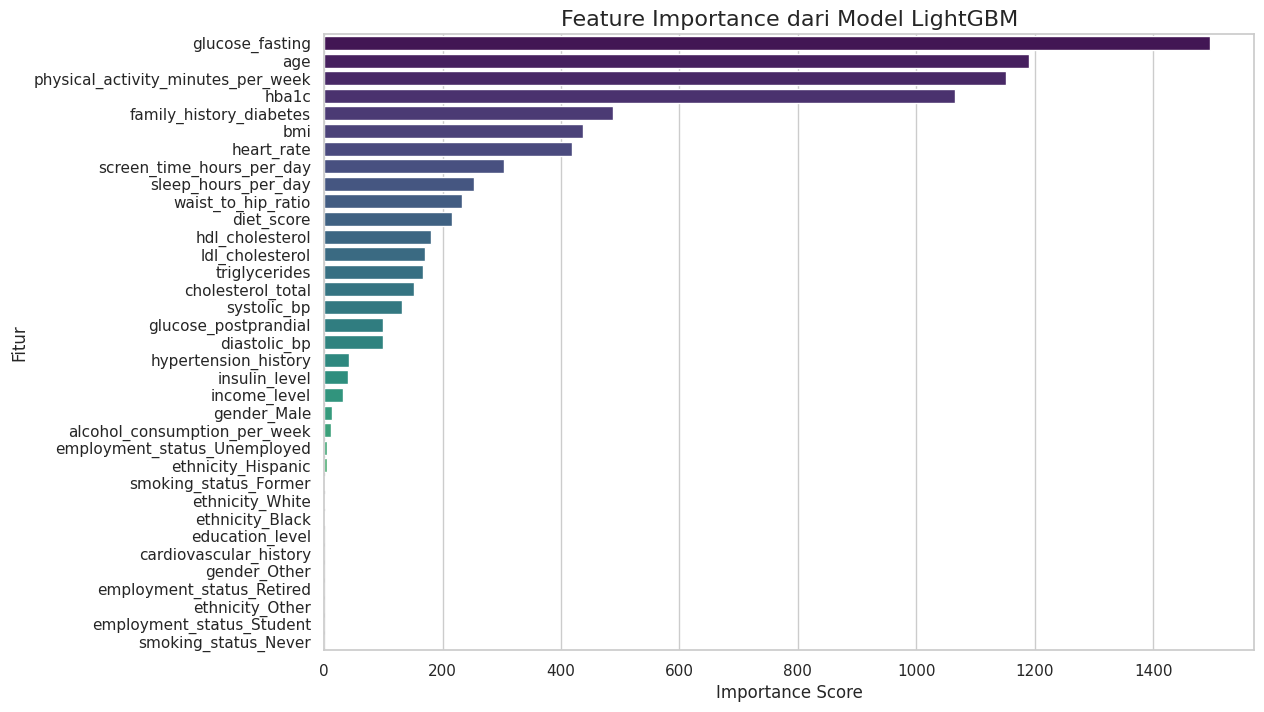

In [ ]:
feature_importances = best_lgbm_model.feature_importances_

feature_df = pd.DataFrame({
  'Feature': X.columns,
  'Importance': feature_importances
})

feature_df = feature_df.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(12, 8))
sns.barplot(x='Importance', y='Feature', data=feature_df, palette='viridis')
plt.title('Feature Importance dari Model LightGBM', fontsize=16)
plt.xlabel('Importance Score', fontsize=12)
plt.ylabel('Fitur', fontsize=12)
plt.show()

## Evaluasi Model LightGBM Pada Test Set

Pada tahap akhir ini, mengambil model LightGBM terbaik hasil tuning (`best_lgbm_model`) dan menggunakannya untuk membuat prediksi pada data uji (`X_test_scaled`) yang selama ini "disembunyikan".

Ini adalah ujian sesungguhnya bagi model. Evaluasi pada test set memberikan estimasi yang paling jujur tentang seberapa baik model akan berkinerja pada data baru di dunia nyata. Ini memvalidasi apakah peningkatan performa yang dilihat selama cross-validation benar-benar dapat digeneralisasi.

Hasil evaluasi final sangat memuaskan, dengan `weighted avg f1-score` 0.92. Yang terpenting, model ini mempertahankan recall sempurna (1.00) untuk 'Pre-Diabetes' dan 'Diabetes'. Ini mengkonfirmasi bahwa model yang telah dioptimalkan tidak hanya akurat tetapi juga sangat andal secara klinis.

In [ ]:
final_predictions = best_lgbm_model.predict(X_test_scaled)

print("Laporan Klasifikasi Final pada Data Uji:")
print(classification_report(y_test, final_predictions, target_names=class_names))

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


Laporan Klasifikasi Final pada Data Uji:
              precision    recall  f1-score   support

 No Diabetes       1.00      0.86      0.93     11936
Pre-Diabetes       0.86      1.00      0.92      1561
    Diabetes       0.83      1.00      0.90      6503

    accuracy                           0.92     20000
   macro avg       0.89      0.95      0.92     20000
weighted avg       0.93      0.92      0.92     20000

